In [113]:
from __future__ import print_function
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.set_context('paper')



def print_ln():
    print('-' * 80, '\n')




import h2o
h2o.init(min_mem_size='27G')

DATA_LOCATION = "../../data/"
MODELS_LOCATION = "../../models/"

MAX_MODELS = 10




Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_265"; OpenJDK Runtime Environment (build 1.8.0_265-8u265-b01-0ubuntu2~16.04-b01); OpenJDK 64-Bit Server VM (build 25.265-b01, mixed mode)
  Starting server from /anaconda/envs/azureml_py36/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpoqty3sto
  JVM stdout: /tmp/tmpoqty3sto/h2o_azureuser_started_from_python.out
  JVM stderr: /tmp/tmpoqty3sto/h2o_azureuser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,5 months and 6 days !!!
H2O_cluster_name:,H2O_from_python_azureuser_99ghhh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,25.88 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [15]:
binarized_final_df = pd.read_csv(DATA_LOCATION + "processed/final.binarized_final_monolabel_df.tsv", "\t", index_col= 'SampleID')
binarized_final_df.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR027458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR027459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR027460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ERR027461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ERR027462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [21]:
binarized_final_frame = h2o.import_file(DATA_LOCATION + "processed/final.binarized_final_monolabel_df.tsv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
train_df = pd.read_csv(DATA_LOCATION + "processed/final.train.tsv", "\t", index_col= 'SampleID')
train_df.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR10380004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR6807701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR11033700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR1163101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [22]:

train_frame = h2o.import_file(DATA_LOCATION + "processed/final.train.tsv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
test_df = pd.read_csv(DATA_LOCATION + "processed/final.test.tsv", "\t", index_col= 'SampleID')
test_df.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR3335735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR8552929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR067629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR067714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR5065314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [23]:

test_frame = h2o.import_file(DATA_LOCATION +  "processed/final.test.tsv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [54]:
index_col = 'SampleID'

# Identify predictors and response columns
predictor_cols = train_frame.columns
response_col = "Resistance_Status"

# Remove the index and response columns from predictor_columns list
predictor_cols.remove(index_col)
predictor_cols.remove(response_col)



# print("train frame - predictor column: ", predictor_cols[0], predictor_cols[-1])
# print("train frame - response column: ", response_col)


# print("test frame - predictor columns: ", predictor_cols[0], predictor_cols[-1])
# print("test frame - response column: ", response_col)

train frame - predictor column:  SampleID Resistance_Status
test frame - predictor columns:  SampleID Resistance_Status


In [25]:
# For binary classification, response should be a factor
train_frame[response_col] = train_frame[response_col].asfactor()
test_frame[response_col] = test_frame[response_col].asfactor()

x = predictor_cols
y = response_col

In [ ]:
from h2o.estimators import H2OPrincipalComponentAnalysisEstimator

pca300 = H2OPrincipalComponentAnalysisEstimator(
                                                   k = 300,
)

pca300.train(x=x, y=y, training_frame=binarized_final_df)


In [ ]:
# save the model
# model_path = h2o.save_model(model= my_pca, path="../models/my_pca_model", force=True)

model_path = MODELS_LOCATION + "PCA300/PCA_model_python_1603962989759_1_k300"

# load the model
pca300 = h2o.load_model(model_path)


In [26]:
pca300_df = pca300.summary().as_data_frame().set_index("")
pca300_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc291,pc292,pc293,pc294,pc295,pc296,pc297,pc298,pc299,pc300
,,,,,,,,,,,,,,,,,,,,,
Standard deviation,8.748536,4.715628,3.877237,3.107335,2.784571,2.583031,2.371838,1.989349,1.914256,1.835004,...,0.241208,0.240459,0.239932,0.239419,0.238373,0.237840,0.237656,0.237487,0.236259,0.236189
Proportion of Variance,0.319086,0.092708,0.062673,0.040254,0.032326,0.027816,0.023453,0.016499,0.015277,0.014038,...,0.000243,0.000241,0.000240,0.000239,0.000237,0.000236,0.000235,0.000235,0.000233,0.000233
Cumulative Proportion,0.319086,0.411794,0.474467,0.514722,0.547048,0.574864,0.598318,0.614817,0.630094,0.644132,...,0.931150,0.931391,0.931631,0.931870,0.932107,0.932342,0.932578,0.932813,0.933046,0.933278


<AxesSubplot:ylabel='Cumulative Proportion'>

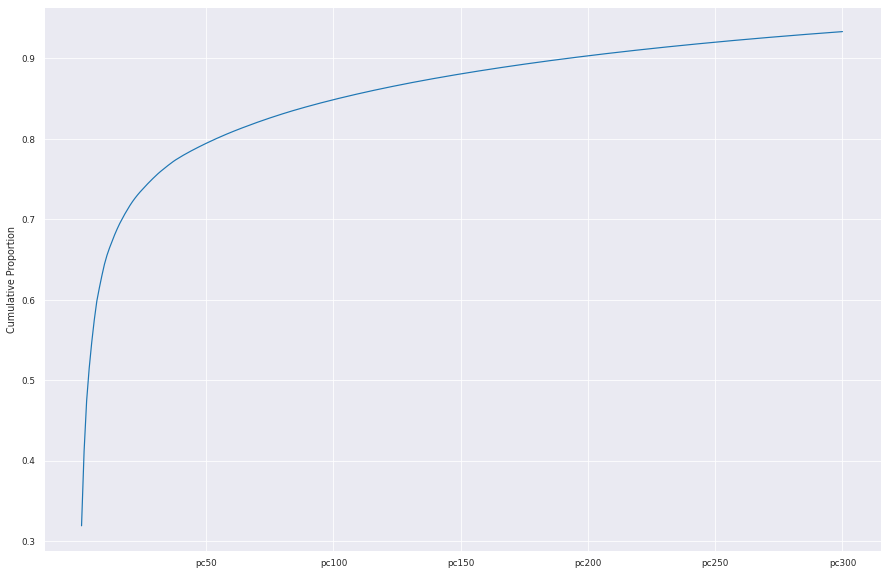

In [27]:
a4_dims = (15, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.set_xticks([49,99,149, 199, 249, 299])
sns.lineplot(ax=ax, data= pca300_df.loc['Cumulative Proportion'])


## Create the PCA transformed predictor columns

In [30]:
train_frame_pca = pca300.predict(train_frame[predictor_cols])
h2o.export_file(frame=train_frame_pca, path= DATA_LOCATION + "processed/final.train_frame.pca300.tsv", force=True)


# train_frame_pca = h2o.import_file(DATA_LOCATION + "processed/final.train_frame.pca300.tsv")
train_frame_pca.head()

pca prediction progress: |████████████████████████████████████████████████| 100%
Export File progress: |███████████████████████████████████████████████████| 100%


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
-7.21528,5.48779,-0.0457426,-3.29582,-8.02517,-2.94974,-2.96759,-2.26629,-0.652408,0.578522,0.182181,0.434753,2.51645,-2.40717,-0.0528002,-0.867347,-0.77548,0.779273,-0.362249,-0.189216,-1.43005,0.0339925,0.0361673,-0.59373,0.642088,-0.0192343,0.0159929,0.10032,-2.14885,0.72847,-0.426612,-2.17743,0.564177,-0.419728,-0.040311,0.174175,0.0958375,-0.840905,-0.412918,0.0362403,-1.12543,1.47642,-0.288826,0.204485,0.970888,0.830999,0.392813,-0.160212,0.045166,-0.775327,0.854433,3.10933,1.62966,-0.403796,2.37824,-1.07053,1.22014,-0.0348898,0.709709,-1.60722,-0.537093,-0.519959,-0.607373,1.96028,-1.37502,0.788434,0.623542,0.117146,-0.662954,-0.788601,0.0349831,-0.104036,0.64312,0.498023,1.10188,1.07592,0.471287,-0.870997,0.134068,0.192699,0.590267,1.93532,1.70993,0.0663423,-0.0086952,-0.131918,0.4172,-1.12597,0.123066,-2.76761,-0.0105532,-0.186149,-0.528908,-0.59734,-0.125254,0.853391,-0.353671,0.527961,-1.19337,0.320649,-0.910347,0.726797,-1.19437,0.643785,2.2666,1.23807,-1.71336,1.6379,-1.35046,-0.0621283,-2.1299,0.338774,-0.294789,0.635849,0.393347,0.461294,0.799493,0.182817,-0.0629657,-0.0312119,0.38403,-0.29482,0.102779,-0.0105114,-0.613126,-0.635172,0.318172,-0.604303,-1.23884,-0.367584,0.13739,0.403578,1.11971,-1.58696,0.0275307,1.58684,-0.519128,0.250662,-0.731469,1.03236,-0.272874,-0.146155,-1.12871,0.518941,-0.731375,-0.186096,0.206038,-0.129464,0.20192,0.0572525,0.337063,1.8732,0.718144,0.609294,-0.0976525,1.02692,1.16342,-0.027039,-0.366797,-0.126558,0.145244,0.0541146,-0.293231,-0.430163,-0.623036,0.119761,0.0857521,0.654185,-0.597948,0.906505,0.00763198,0.760529,-0.196652,1.37364,0.38687,1.06562,-0.592595,0.096302,-0.982776,0.205194,0.795516,1.4415,0.103181,0.958078,-0.024321,0.423626,0.416048,-0.422432,-0.822004,0.286042,-0.334727,0.236006,0.430699,-1.99712,0.0612397,-0.281902,0.561714,-0.545934,0.920071,-0.603047
-11.6,5.53472,-0.0676378,0.442869,6.54339,0.485848,-2.2913,-1.48508,-1.26789,2.48786,1.61519,-1.82951,-1.14724,-0.686728,0.0791433,0.244093,-0.673544,-0.298431,0.569891,1.3156,0.936164,-1.74636,-1.05101,0.351799,-0.744067,0.26847,-0.322997,-0.0033458,0.139044,0.83802,0.0462784,0.18821,0.0188327,0.311519,-0.103977,0.924853,1.06325,-0.617407,0.416026,0.152573,-0.00922459,-0.540769,-0.42493,0.224336,0.842236,-0.0829223,0.104743,-0.249455,-0.237306,0.123351,0.373262,0.402359,0.0419783,-1.21117,-0.482892,-0.974701,-0.132585,0.422715,-0.532571,-0.512553,-0.417771,0.55964,-0.123657,-0.481367,-0.395624,0.235399,-0.338215,-0.311371,0.25003,-0.187722,-0.145724,0.0526789,0.49318,0.0865632,-0.12011,-0.482305,0.176727,-0.126995,-0.1996,-0.169428,0.0459824,-0.10309,-0.100268,-0.066558,0.290223,0.0640084,0.192294,0.367173,-0.726469,-0.255324,0.376527,0.0864552,0.429294,0.361994,-0.0955574,0.10195,0.101228,-0.164574,0.105739,0.0161596,-0.309447,-0.148715,0.0122466,0.408371,-0.140452,0.34785,0.134036,0.312078,0.0964443,0.262582,0.0372175,0.103305,0.0706207

In [31]:
test_frame_pca = pca300.predict(test_frame[predictor_cols])
h2o.export_file(frame=test_frame_pca, path= DATA_LOCATION + "processed/final.test_frame.pca300.tsv", force=True)

# test_frame_pca = h2o.import_file(DATA_LOCATION + "processed/final.test_frame.pca300.tsv")
test_frame_pca.head()

pca prediction progress: |████████████████████████████████████████████████| 100%
Export File progress: |███████████████████████████████████████████████████| 100%


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
-9.62946,3.42749,-0.0544876,-1.99728,-0.501536,5.33675,1.88318,2.34222,0.550157,2.24487,1.01714,-0.274509,0.473391,-1.15809,0.0800588,-1.07554,1.76168,2.19104,-0.0812096,-1.188,0.480369,1.51523,-0.73458,0.856701,-0.463986,1.1826,-0.756524,0.0237812,0.516223,1.13772,-0.564756,0.633247,-0.349465,-0.067741,0.234908,-0.444675,0.17611,-0.532194,0.0915564,-0.113063,1.13146,-0.302093,0.490816,-0.493271,-0.585398,0.8064,-0.424099,-0.672412,0.236234,0.621226,0.421086,-0.957542,0.609662,-0.625019,0.188252,0.878188,-0.0257143,-0.138875,-0.0223257,1.23374,-0.363303,-0.19214,0.637254,0.567913,0.199097,-0.825055,0.482516,0.0236314,-0.274883,-0.26622,0.389476,-0.254482,0.476774,0.806681,-0.515323,-0.268944,-0.521861,-0.0541904,0.0623078,-0.427573,0.209428,0.675307,-0.156747,-0.488074,0.266841,0.216901,-0.365613,-0.483448,-0.16199,-0.311047,-0.877527,-0.30912,-0.48697,0.149168,-0.372397,-0.163269,-0.117403,0.138337,-0.19628,0.201152,-0.0601995,0.192374,-0.52172,-0.127364,-0.232277,-0.0896376,-0.125402,0.187321,-0.271664,-0.2616,0.0108175,0.43486,-0.319592,0.198224,-0.258672,-0.383842,-0.435208,0.323674,-0.708164,-0.422046,-0.207349,-0.780153,0.00302298,0.213339,0.0179504,0.450774,-0.478498,-0.0366665,0.0296298,0.283827,-0.472738,0.0141913,0.275673,0.052553,0.255064,0.240547,0.15366,-0.170729,0.243725,0.588446,0.528715,-0.147671,-0.216204,0.56448,-0.525028,0.0715956,0.332453,-0.223248,0.61728,0.123985,-0.0749367,0.0996517,-0.257484,-0.405051,0.293621,-0.227607,-0.427547,-0.384105,0.20133,-0.0139542,-0.396255,0.0760807,0.15238,0.0874545,0.195867,0.241876,0.124269,-0.272356,0.188318,0.0350412,0.100087,0.0796334,-0.349118,0.14185,-0.00669717,0.19513,0.223768,-0.268808,-0.19858,-0.134069,0.213021,-0.0708481,-0.370438,-0.42775,-0.0108664,-0.189859,-0.370499,-0.286406,0.192455,0.252574,-0.241866,-0.0577385,0.207005,-0.373174,-0.254423,0.370247,0.0748705,0.00531612,0.150201,0.0503638
-6.50059,5.03212,9.89964,-1.75115,-1.99842,5.18436,5.72881,22.9759,-72.9113,-19.4345,3.5075,0.688388,1.69246,-0.351719,0.807579,0.162097,0.751626,-0.18388,0.114748,-0.708287,-0.431597,0.0908924,0.351024,-0.106659,-0.333741,-0.275902,-0.0169099,0.738175,0.298389,0.173786,-0.232006,-0.157514,-0.0104423,-0.0416099,0.00259742,0.153628,-0.130673,-0.0629438,0.103533,0.00953883,-0.0284005,0.101688,-0.15913,0.126722,-0.0756605,-0.0757435,0.0441156,0.0158992,0.0966239,-0.0160974,-0.00503431,0.0116024,0.0095455,-0.0067565,-0.026261,-0.0215083,0.0502305,-0.0297334,0.00990971,-0.0598099,0.0232784,-0.0248749,-0.0285802,0.00209873,0.0368059,0.0434571,-0.0579956,-0.000134279,0.0298716,-0.0178984,0.0093227,-0.0204604,-0.0540928,0.0371086,0.00754352,-0.0336085,-0.0019139,0.00628899,-0.0455008,0.052359,0.0163493,0.00218547,0.0132377,0.00211587,-0.0146862,-0.00559338,-0.000155938,0.00755395,0.0033325,0.00209277,0.00105389,-0.0748952,0.0101986,-0.0145325,-0.00125014,-0.0258381,-0.0540903,-0.0410478,0.0387674,0.00351536,

## Create new dataframes from the PCA components

In [42]:
train_frame_pca_df = train_frame_pca.as_data_frame()
train_frame_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
0,-7.215279,5.487787,-0.045743,-3.295824,-8.025171,-2.949743,-2.967593,-2.266287,-0.652408,0.578522,...,0.012587,0.371804,-0.071848,-0.341443,0.465335,-0.433011,-0.265740,-0.491029,-0.128080,0.655469
1,-11.599985,5.534724,-0.067638,0.442869,6.543390,0.485848,-2.291297,-1.485078,-1.267895,2.487861,...,0.054867,0.137572,0.059569,0.114289,-0.194232,0.028769,0.060136,0.102203,0.070037,-0.115447
2,-9.149900,-4.451211,-0.000561,-0.211492,0.891811,-1.619368,-0.031481,-1.116217,-0.521429,0.226712,...,-0.161497,0.041387,0.080233,-0.031551,0.088953,0.104130,0.031573,-0.036647,0.139434,0.224164
3,-4.590492,5.312944,-0.043539,-1.586112,-3.702485,-0.156249,2.930343,-4.974554,-0.930162,-0.817911,...,-0.465097,0.220127,0.127802,0.044233,0.098754,0.005934,-0.151121,0.346246,0.041682,-0.487852
4,-8.682463,-4.772522,0.003525,0.094409,0.517031,-3.716390,0.988545,0.652860,-0.217747,0.573477,...,-0.182978,-0.093368,0.121302,0.067732,-0.121732,0.079970,-0.121168,0.044018,-0.070295,0.017215


In [43]:
test_frame_pca_df = test_frame_pca.as_data_frame()
test_frame_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
0,-9.629457,3.427494,-0.054488,-1.997283,-0.501536,5.336753,1.883176,2.342219,0.550157,2.244874,...,0.127281,0.080378,0.342437,-0.283436,-0.272764,-0.157943,-0.103696,-0.056571,-0.413420,-0.201708
1,-6.500589,5.032125,9.899641,-1.751147,-1.998420,5.184365,5.728812,22.975901,-72.911270,-19.434493,...,-0.005212,-0.002507,-0.001169,0.001140,-0.000947,0.004027,0.005030,-0.003485,0.002891,-0.003535
2,-12.947850,4.520129,-0.072757,0.795501,5.604925,-3.833929,-0.123111,0.276374,-0.394928,1.513401,...,-0.052364,-0.218587,0.404883,0.508618,0.063992,0.420349,-0.243656,-0.125900,-0.114601,0.135860
3,-8.945284,-5.015450,0.002182,0.197580,0.776913,-3.340270,0.435418,-0.418539,-0.392206,0.062804,...,0.033338,-0.027150,0.042037,-0.027205,-0.192404,-0.003779,-0.075270,-0.038884,0.059448,0.089166
4,-8.616033,-5.402211,0.008112,-0.470638,-0.436735,2.802968,-0.717564,0.032025,0.384208,-0.915967,...,0.317406,-0.058061,0.173129,0.315004,0.085500,0.000209,0.275298,0.104563,-0.004634,0.090837


In [44]:
response_col_df = train_frame[response_col].as_data_frame()
index_col_df = train_frame[index_col].as_data_frame()

train_pca_df = (train_frame_pca_df.join(response_col_df)).join(index_col_df).set_index('SampleID')
train_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,-7.215279,5.487787,-0.045743,-3.295824,-8.025171,-2.949743,-2.967593,-2.266287,-0.652408,0.578522,...,0.371804,-0.071848,-0.341443,0.465335,-0.433011,-0.265740,-0.491029,-0.128080,0.655469,1
SRR10380004,-11.599985,5.534724,-0.067638,0.442869,6.543390,0.485848,-2.291297,-1.485078,-1.267895,2.487861,...,0.137572,0.059569,0.114289,-0.194232,0.028769,0.060136,0.102203,0.070037,-0.115447,1
SRR6807701,-9.149900,-4.451211,-0.000561,-0.211492,0.891811,-1.619368,-0.031481,-1.116217,-0.521429,0.226712,...,0.041387,0.080233,-0.031551,0.088953,0.104130,0.031573,-0.036647,0.139434,0.224164,1
SRR11033700,-4.590492,5.312944,-0.043539,-1.586112,-3.702485,-0.156249,2.930343,-4.974554,-0.930162,-0.817911,...,0.220127,0.127802,0.044233,0.098754,0.005934,-0.151121,0.346246,0.041682,-0.487852,1
SRR1163101,-8.682463,-4.772522,0.003525,0.094409,0.517031,-3.716390,0.988545,0.652860,-0.217747,0.573477,...,-0.093368,0.121302,0.067732,-0.121732,0.079970,-0.121168,0.044018,-0.070295,0.017215,1


In [46]:
train_pca_df.to_csv(DATA_LOCATION + "processed/train_pca_df.tsv", "\t")

train_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,-7.215279,5.487787,-0.045743,-3.295824,-8.025171,-2.949743,-2.967593,-2.266287,-0.652408,0.578522,...,0.371804,-0.071848,-0.341443,0.465335,-0.433011,-0.265740,-0.491029,-0.128080,0.655469,1
SRR10380004,-11.599985,5.534724,-0.067638,0.442869,6.543390,0.485848,-2.291297,-1.485078,-1.267895,2.487861,...,0.137572,0.059569,0.114289,-0.194232,0.028769,0.060136,0.102203,0.070037,-0.115447,1
SRR6807701,-9.149900,-4.451211,-0.000561,-0.211492,0.891811,-1.619368,-0.031481,-1.116217,-0.521429,0.226712,...,0.041387,0.080233,-0.031551,0.088953,0.104130,0.031573,-0.036647,0.139434,0.224164,1
SRR11033700,-4.590492,5.312944,-0.043539,-1.586112,-3.702485,-0.156249,2.930343,-4.974554,-0.930162,-0.817911,...,0.220127,0.127802,0.044233,0.098754,0.005934,-0.151121,0.346246,0.041682,-0.487852,1
SRR1163101,-8.682463,-4.772522,0.003525,0.094409,0.517031,-3.716390,0.988545,0.652860,-0.217747,0.573477,...,-0.093368,0.121302,0.067732,-0.121732,0.079970,-0.121168,0.044018,-0.070295,0.017215,1


In [45]:
response_col_df = test_frame[response_col].as_data_frame()
index_col_df = test_frame[index_col].as_data_frame()

test_pca_df = (test_frame_pca_df.join(response_col_df)).join(index_col_df).set_index('SampleID')
test_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR3335735,-9.629457,3.427494,-0.054488,-1.997283,-0.501536,5.336753,1.883176,2.342219,0.550157,2.244874,...,0.080378,0.342437,-0.283436,-0.272764,-0.157943,-0.103696,-0.056571,-0.413420,-0.201708,1
SRR8552929,-6.500589,5.032125,9.899641,-1.751147,-1.998420,5.184365,5.728812,22.975901,-72.911270,-19.434493,...,-0.002507,-0.001169,0.001140,-0.000947,0.004027,0.005030,-0.003485,0.002891,-0.003535,1
ERR067629,-12.947850,4.520129,-0.072757,0.795501,5.604925,-3.833929,-0.123111,0.276374,-0.394928,1.513401,...,-0.218587,0.404883,0.508618,0.063992,0.420349,-0.243656,-0.125900,-0.114601,0.135860,1
ERR067714,-8.945284,-5.015450,0.002182,0.197580,0.776913,-3.340270,0.435418,-0.418539,-0.392206,0.062804,...,-0.027150,0.042037,-0.027205,-0.192404,-0.003779,-0.075270,-0.038884,0.059448,0.089166,1
SRR5065314,-8.616033,-5.402211,0.008112,-0.470638,-0.436735,2.802968,-0.717564,0.032025,0.384208,-0.915967,...,-0.058061,0.173129,0.315004,0.085500,0.000209,0.275298,0.104563,-0.004634,0.090837,1


In [47]:
test_pca_df.to_csv(DATA_LOCATION + "processed/test_pca_df.tsv", "\t")

test_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR3335735,-9.629457,3.427494,-0.054488,-1.997283,-0.501536,5.336753,1.883176,2.342219,0.550157,2.244874,...,0.080378,0.342437,-0.283436,-0.272764,-0.157943,-0.103696,-0.056571,-0.413420,-0.201708,1
SRR8552929,-6.500589,5.032125,9.899641,-1.751147,-1.998420,5.184365,5.728812,22.975901,-72.911270,-19.434493,...,-0.002507,-0.001169,0.001140,-0.000947,0.004027,0.005030,-0.003485,0.002891,-0.003535,1
ERR067629,-12.947850,4.520129,-0.072757,0.795501,5.604925,-3.833929,-0.123111,0.276374,-0.394928,1.513401,...,-0.218587,0.404883,0.508618,0.063992,0.420349,-0.243656,-0.125900,-0.114601,0.135860,1
ERR067714,-8.945284,-5.015450,0.002182,0.197580,0.776913,-3.340270,0.435418,-0.418539,-0.392206,0.062804,...,-0.027150,0.042037,-0.027205,-0.192404,-0.003779,-0.075270,-0.038884,0.059448,0.089166,1
SRR5065314,-8.616033,-5.402211,0.008112,-0.470638,-0.436735,2.802968,-0.717564,0.032025,0.384208,-0.915967,...,-0.058061,0.173129,0.315004,0.085500,0.000209,0.275298,0.104563,-0.004634,0.090837,1


In [114]:
# train_pca_df_frame = h2o.H2OFrame(train_pca_df)
train_pca_df_frame = h2o.import_file(DATA_LOCATION + "processed/train_pca_df.tsv")

train_pca_df_frame.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


SampleID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199
SRR10525336,-7.21528,5.48779,-0.0457426,-3.29582,-8.02517,-2.94974,-2.96759,-2.26629,-0.652408,0.578522,0.182181,0.434753,2.51645,-2.40717,-0.0528002,-0.867347,-0.77548,0.779273,-0.362249,-0.189216,-1.43005,0.0339925,0.0361673,-0.59373,0.642088,-0.0192343,0.0159929,0.10032,-2.14885,0.72847,-0.426612,-2.17743,0.564177,-0.419728,-0.040311,0.174175,0.0958375,-0.840905,-0.412918,0.0362403,-1.12543,1.47642,-0.288826,0.204485,0.970888,0.830999,0.392813,-0.160212,0.045166,-0.775327,0.854433,3.10933,1.62966,-0.403796,2.37824,-1.07053,1.22014,-0.0348898,0.709709,-1.60722,-0.537093,-0.519959,-0.607373,1.96028,-1.37502,0.788434,0.623542,0.117146,-0.662954,-0.788601,0.0349831,-0.104036,0.64312,0.498023,1.10188,1.07592,0.471287,-0.870997,0.134068,0.192699,0.590267,1.93532,1.70993,0.0663423,-0.0086952,-0.131918,0.4172,-1.12597,0.123066,-2.76761,-0.0105532,-0.186149,-0.528908,-0.59734,-0.125254,0.853391,-0.353671,0.527961,-1.19337,0.320649,-0.910347,0.726797,-1.19437,0.643785,2.2666,1.23807,-1.71336,1.6379,-1.35046,-0.0621283,-2.1299,0.338774,-0.294789,0.635849,0.393347,0.461294,0.799493,0.182817,-0.0629657,-0.0312119,0.38403,-0.29482,0.102779,-0.0105114,-0.613126,-0.635172,0.318172,-0.604303,-1.23884,-0.367584,0.13739,0.403578,1.11971,-1.58696,0.0275307,1.58684,-0.519128,0.250662,-0.731469,1.03236,-0.272874,-0.146155,-1.12871,0.518941,-0.731375,-0.186096,0.206038,-0.129464,0.20192,0.0572525,0.337063,1.8732,0.718144,0.609294,-0.0976525,1.02692,1.16342,-0.027039,-0.366797,-0.126558,0.145244,0.0541146,-0.293231,-0.430163,-0.623036,0.119761,0.0857521,0.654185,-0.597948,0.906505,0.00763198,0.760529,-0.196652,1.37364,0.38687,1.06562,-0.592595,0.096302,-0.982776,0.205194,0.795516,1.4415,0.103181,0.958078,-0.024321,0.423626,0.416048,-0.422432,-0.822004,0.286042,-0.334727,0.236006,0.430699,-1.99712,0.0612397,-0.281902,0.561714,-0.545934,0.920071
SRR10380004,-11.6,5.53472,-0.0676378,0.442869,6.54339,0.485848,-2.2913,-1.48508,-1.26789,2.48786,1.61519,-1.82951,-1.14724,-0.686728,0.0791433,0.244093,-0.673544,-0.298431,0.569891,1.3156,0.936164,-1.74636,-1.05101,0.351799,-0.744067,0.26847,-0.322997,-0.0033458,0.139044,0.83802,0.0462784,0.18821,0.0188327,0.311519,-0.103977,0.924853,1.06325,-0.617407,0.416026,0.152573,-0.00922459,-0.540769,-0.42493,0.224336,0.842236,-0.0829223,0.104743,-0.249455,-0.237306,0.123351,0.373262,0.402359,0.0419783,-1.21117,-0.482892,-0.974701,-0.132585,0.422715,-0.532571,-0.512553,-0.417771,0.55964,-0.123657,-0.481367,-0.395624,0.235399,-0.338215,-0.311371,0.25003,-0.187722,-0.145724,0.0526789,0.49318,0.0865632,-0.12011,-0.482305,0.176727,-0.126995,-0.1996,-0.169428,0.0459824,-0.10309,-0.100268,-0.066558,0.290223,0.0640084,0.192294,0.367173,-0.726469,-0.255324,0.376527,0.0864552,0.429294,0.361994,-0.0955574,0.10195,0.101228,-0.164574,0.105739,0.0161596,-0.309447,-0.148715,0.0122466,0.408371,-0.140452,0.34785,0.134036,0.312078,0.0964443,0.262582,0.0372175,0

In [115]:
# test_pca_df_frame = h2o.H2OFrame(test_pca_df)
test_pca_df_frame = h2o.import_file(DATA_LOCATION + "processed/test_pca_df.tsv")

test_pca_df_frame.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


SampleID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199
ERR3335735,-9.62946,3.42749,-0.0544876,-1.99728,-0.501536,5.33675,1.88318,2.34222,0.550157,2.24487,1.01714,-0.274509,0.473391,-1.15809,0.0800588,-1.07554,1.76168,2.19104,-0.0812096,-1.188,0.480369,1.51523,-0.73458,0.856701,-0.463986,1.1826,-0.756524,0.0237812,0.516223,1.13772,-0.564756,0.633247,-0.349465,-0.067741,0.234908,-0.444675,0.17611,-0.532194,0.0915564,-0.113063,1.13146,-0.302093,0.490816,-0.493271,-0.585398,0.8064,-0.424099,-0.672412,0.236234,0.621226,0.421086,-0.957542,0.609662,-0.625019,0.188252,0.878188,-0.0257143,-0.138875,-0.0223257,1.23374,-0.363303,-0.19214,0.637254,0.567913,0.199097,-0.825055,0.482516,0.0236314,-0.274883,-0.26622,0.389476,-0.254482,0.476774,0.806681,-0.515323,-0.268944,-0.521861,-0.0541904,0.0623078,-0.427573,0.209428,0.675307,-0.156747,-0.488074,0.266841,0.216901,-0.365613,-0.483448,-0.16199,-0.311047,-0.877527,-0.30912,-0.48697,0.149168,-0.372397,-0.163269,-0.117403,0.138337,-0.19628,0.201152,-0.0601995,0.192374,-0.52172,-0.127364,-0.232277,-0.0896376,-0.125402,0.187321,-0.271664,-0.2616,0.0108175,0.43486,-0.319592,0.198224,-0.258672,-0.383842,-0.435208,0.323674,-0.708164,-0.422046,-0.207349,-0.780153,0.00302298,0.213339,0.0179504,0.450774,-0.478498,-0.0366665,0.0296298,0.283827,-0.472738,0.0141913,0.275673,0.052553,0.255064,0.240547,0.15366,-0.170729,0.243725,0.588446,0.528715,-0.147671,-0.216204,0.56448,-0.525028,0.0715956,0.332453,-0.223248,0.61728,0.123985,-0.0749367,0.0996517,-0.257484,-0.405051,0.293621,-0.227607,-0.427547,-0.384105,0.20133,-0.0139542,-0.396255,0.0760807,0.15238,0.0874545,0.195867,0.241876,0.124269,-0.272356,0.188318,0.0350412,0.100087,0.0796334,-0.349118,0.14185,-0.00669717,0.19513,0.223768,-0.268808,-0.19858,-0.134069,0.213021,-0.0708481,-0.370438,-0.42775,-0.0108664,-0.189859,-0.370499,-0.286406,0.192455,0.252574,-0.241866,-0.0577385,0.207005,-0.373174,-0.254423,0.370247,0.0748705,0.00531612,0.150201
SRR8552929,-6.50059,5.03212,9.89964,-1.75115,-1.99842,5.18436,5.72881,22.9759,-72.9113,-19.4345,3.5075,0.688388,1.69246,-0.351719,0.807579,0.162097,0.751626,-0.18388,0.114748,-0.708287,-0.431597,0.0908924,0.351024,-0.106659,-0.333741,-0.275902,-0.0169099,0.738175,0.298389,0.173786,-0.232006,-0.157514,-0.0104423,-0.0416099,0.00259742,0.153628,-0.130673,-0.0629438,0.103533,0.00953883,-0.0284005,0.101688,-0.15913,0.126722,-0.0756605,-0.0757435,0.0441156,0.0158992,0.0966239,-0.0160974,-0.00503431,0.0116024,0.0095455,-0.0067565,-0.026261,-0.0215083,0.0502305,-0.0297334,0.00990971,-0.0598099,0.0232784,-0.0248749,-0.0285802,0.00209873,0.0368059,0.0434571,-0.0579956,-0.000134279,0.0298716,-0.0178984,0.0093227,-0.0204604,-0.0540928,0.0371086,0.00754352,-0.0336085,-0.0019139,0.00628899,-0.0455008,0.052359,0.0163493,0.00218547,0.0132377,0.00211587,-0.0146862,-0.00559338,-0.000155938,0.00755395,0.0033325,0.00209277,0.00105389,-0.0748952,0.0101986,-0.0145325,-0.00125014,-0.0258381,-0.0540903,-0.0410478,0.0387

## Model development with the transformed PCA datasets

In [116]:
index_col = 'SampleID'
nfolds = 5

# Identify predictors and response columns
predictor_cols = train_pca_df_frame.columns
response_col = "Resistance_Status"

predictor_cols.remove(response_col)


In [117]:
# For binary classification, response should be a factor
train_pca_df_frame[response_col] = train_pca_df_frame[response_col].asfactor()
test_pca_df_frame[response_col] = test_pca_df_frame[response_col].asfactor()

x = predictor_cols
y = response_col

## AutoML models on transformed data

In [62]:
from h2o.automl import H2OAutoML

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1234, stopping_metric= 'AUTO')
aml.train(x=x, y=y, training_frame=train_pca_df_frame)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)   


AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201108_044243,0.898379,0.385515,0.939439,0.201463,0.345492,0.119365
StackedEnsemble_AllModels_AutoML_20201108_044243,0.897125,0.389261,0.93964,0.194425,0.347953,0.121071
GBM_4_AutoML_20201108_044243,0.884563,0.412288,0.930272,0.205892,0.360915,0.13026
GBM_grid__1_AutoML_20201108_044243_model_2,0.883757,0.412247,0.929666,0.212998,0.358975,0.128863
GBM_2_AutoML_20201108_044243,0.882101,0.408096,0.924653,0.190866,0.356368,0.126998
GBM_grid__1_AutoML_20201108_044243_model_1,0.879994,0.411873,0.926902,0.219601,0.360577,0.130016
GBM_3_AutoML_20201108_044243,0.876952,0.418408,0.923052,0.212156,0.363543,0.132164
GBM_1_AutoML_20201108_044243,0.876497,0.422203,0.925008,0.222101,0.365536,0.133617
GLM_1_AutoML_20201108_044243,0.875757,0.426938,0.921075,0.228976,0.368016,0.135436
XGBoost_grid__1_AutoML_20201108_044243_model_3,0.872385,0.513561,0.917598,0.220728,0.371594,0.138082


In [65]:
all_automl_model_ids = aml.leaderboard['model_id'].as_data_frame()['model_id'].tolist()

for mdl_id in all_automl_model_ids:
    print(mdl_id)
    h2o.save_model(model= h2o.get_model(mdl_id), path= MODELS_LOCATION + "pca300/aml_models", force=True)




StackedEnsemble_BestOfFamily_AutoML_20201108_044243
StackedEnsemble_AllModels_AutoML_20201108_044243
GBM_4_AutoML_20201108_044243
GBM_grid__1_AutoML_20201108_044243_model_2
GBM_2_AutoML_20201108_044243
GBM_grid__1_AutoML_20201108_044243_model_1
GBM_3_AutoML_20201108_044243
GBM_1_AutoML_20201108_044243
GLM_1_AutoML_20201108_044243
XGBoost_grid__1_AutoML_20201108_044243_model_3
GBM_5_AutoML_20201108_044243
XGBoost_grid__1_AutoML_20201108_044243_model_4
XGBoost_grid__1_AutoML_20201108_044243_model_1
XGBoost_3_AutoML_20201108_044243
DeepLearning_grid__2_AutoML_20201108_044243_model_1
XGBoost_1_AutoML_20201108_044243
DRF_1_AutoML_20201108_044243
XRT_1_AutoML_20201108_044243
XGBoost_grid__1_AutoML_20201108_044243_model_2
XGBoost_2_AutoML_20201108_044243
DeepLearning_grid__1_AutoML_20201108_044243_model_1
DeepLearning_1_AutoML_20201108_044243


## Naive-Bayes Grid

In [69]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ONaiveBayesEstimator



hyper_params = {
                "laplace": [0.1, 0.3, 0.6, 0.9, 1.0],
                "min_sdev":[0.1, 0.3, 0.6, 0.9, 1.0],
                "eps_sdev":[0.1, 0.3, 0.6, 0.9, 1.0],
                "min_prob":[0.1, 0.3, 0.6, 0.9, 1.0],
                "eps_prob":[0.1, 0.3, 0.6, 0.9, 1.0],
                "compute_metrics": [True, False]
                }

search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}



base_model = H2ONaiveBayesEstimator(
                                 nfolds=nfolds, 
                                 fold_assignment = "random",
                                 keep_cross_validation_predictions = True,
                                 seed=1234)




nb_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria)


nb_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame) 


naivebayes Grid Build progress: |█████████████████████████████████████████| 100%


In [71]:
h2o.save_grid(MODELS_LOCATION + "pca300/nb_grid", nb_grid.grid_id)

'../../models/pca300/nb_grid/Grid_NaiveBayes_py_30_sid_bdfe_model_python_1604806499448_2178'

## GLM Grid

In [76]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OGeneralizedLinearEstimator


hyper_params = {
# lambda //use self.lambda_
# "missing_values_handling" : ["mean_imputation", "skip", "plug_values"],
# 'standardize'

"alpha" : [0, 0.3, 0.6, 0.9, 1],
"theta" : [0, 0.3, 0.6, 0.9, 1],
"tweedie_link_power" : [0, 0.3, 0.6, 0.9, 1, 3, 6, 9],
"tweedie_variance_power" : [0, 0.3, 0.6, 0.9, 1, 3, 6, 9],
}

search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}


# Train and cross-validate a NB
base_model = H2OGeneralizedLinearEstimator(
                                family= "binomial",

                                 nfolds=nfolds, 
                                 fold_assignment = "random",
                                 keep_cross_validation_predictions = True,
                                 seed=1234)




# Train the grid
glm_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria)


glm_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame) 



glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [77]:
h2o.save_grid(MODELS_LOCATION + "pca300/glm_grid", glm_grid.grid_id)

'../../models/pca300/glm_grid/Grid_GLM_py_30_sid_bdfe_model_python_1604806499448_2504'

## GBM Grid

In [79]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OGradientBoostingEstimator



hyper_params = {
'learn_rate': [0.1, 0.3, 0.6, 0.9],
'learn_rate_annealing': [0.1, 0.3, 0.6, 0.9, 1],
'distribution': ['bernoulli', 'multinomial'],
'quantile_alpha':[0.1, 0.3, 0.5, 0.8, 1],
'tweedie_power': [1.1, 1.5,1.9],
'col_sample_rate': [0.1, 0.3, 0.7, 0.9],
'balance_classes': [True, False],
'ntrees': [10, 20, 50, 100, 150],
'max_depth': [5, 10, 15, 20], # defaults to 20
'sample_rate': [ 0.1, 0.3, 0.6, 0.9],
'col_sample_rate_per_tree': [ 0.1, 0.3, 0.6, 0.8, 1],
'col_sample_rate_change_per_level': [ 0.1, 0.3, 0.6, 0.8, 1, 1.3, 1.5, 1.7, 1.9],
'histogram_type': ["AUTO", "UniformAdaptive", "Random", "QuantilesGlobal", "RoundRobin"]

#'max_abs_leafnode_pred' # use default value
#'class_sampling_factors',
#'max_after_balance_size',
#'min_rows', # defaults to 1
#'nbins', # default is 20
#'nbins_top_level', # requires too much tuning
#'nbins_cats', # requires too much tuning
#'r2_stopping',
#'seed',
#'build_tree_one_node',
#'sample_rate_per_class':[ 0.1, 0.3, 0.6, 0.9],
#'score_tree_interval',
#'min_split_improvement',

}


search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}




base_model = H2OGradientBoostingEstimator(


                                 nfolds=nfolds, 
                                 fold_assignment = "random",
                                 keep_cross_validation_predictions = True,
                                 seed=1234
                                 )




# Train the grid
gbm_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria,
                     parallelism= 1)


gbm_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame) 

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [80]:
h2o.save_grid(MODELS_LOCATION + "pca300/gbm_grid", gbm_grid.grid_id)

'../../models/pca300/gbm_grid/Grid_GBM_py_30_sid_bdfe_model_python_1604806499448_4444'

## DRF Grid

In [123]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator



hyper_params = {
'mtries': [-1, 30, 60, 90, 150, 200],
'balance_classes': [True, False],
'ntrees': [10, 20, 50, 100, 150],
'max_depth': [5, 10, 15, 20], # defaults to 20
'sample_rate': [ 0.1, 0.3, 0.6, 0.9],
'col_sample_rate_per_tree': [ 0.1, 0.3, 0.6, 0.8, 1],
'col_sample_rate_change_per_level': [ 0.1, 0.3, 0.6, 0.8, 1, 1.3, 1.5, 1.7, 1.9],
'histogram_type': ["AUTO", "UniformAdaptive", "Random", "QuantilesGlobal", "RoundRobin"]

#'score_tree_interval',
#'min_split_improvement',
#'class_sampling_factors',
#'max_after_balance_size',
#'min_rows', # defaults to 1
#'nbins', # default is 20
#'nbins_top_level', # requires too much tuning
#'nbins_cats', # requires too much tuning
#'r2_stopping',
#'seed',
#'build_tree_one_node',
#'sample_rate_per_class':[ 0.1, 0.9],
}

search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}



base_model = H2ORandomForestEstimator(

                                 nfolds=nfolds, 
                                 fold_assignment = "random",
                                 keep_cross_validation_predictions = True,
                                 seed=1234)




# Train the grid
drf_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria,
                     parallelism= 1)


drf_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame) 



drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [124]:
h2o.save_grid(MODELS_LOCATION + "pca300/drf_grid", drf_grid.grid_id)


'../../models/pca300/drf_grid/Grid_DRF_py_173_sid_9c98_model_python_1604825008375_8677'

## DL Grid

In [103]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ODeepLearningEstimator



hyper_params = {
#   'adaptive_rate',
#   'average_activation',
#   'balance_classes',
#   'categorical_encoding',
#   'classification_stop',
#   'class_sampling_factors',
#   'col_major',
#   'elastic_averaging_moving_rate',
#   'elastic_averaging_regularization',
#   'elastic_averaging',
#   'epochs',
#   'epsilon',
#   'fast_mode',
#   'force_load_balance',
#   'initial_biases',
#   'initial_weights',
#   'initial_weight_distribution',
#   'initial_weight_scale',
#   'l1',
#   'l2',
#   'max_after_balance_size',
#   'max_categorical_features',
#   'max_w2',
#   'missing_values_handling',
#   'momentum_ramp',
#   'momentum_stable',
#   'momentum_start',
#   'nesterov_accelerated_gradient',
#   'overwrite_with_best_model',
#   'quantile_alpha',
#   'quiet_mode',
#   'rate_annealing',
#   'rate_decay',
#   'rate',
#   'regression_stop',
#   'replicate_training_data',
#   'reproducible',
#   'score_duty_cycle',
#   'score_interval',
#   'score_training_samples',
#   'score_validation_samples',
#   'score_validation_sampling',
#   'seed',
#   'shuffle_training_data',
#   'single_node_mode',
#   'sparse',
#   'sparsity_beta',
#   'target_ratio_comm_to_comp',
#   'train_samples_per_iteration',
#   'tweedie_power',
#   'use_all_factor_levels',
#   'variable_importances ',
            #   "hidden_dropout_ratios": [0, 0.1, 0.2, [0.5, 0.5], [0.5, 0.5]]  ,


              "activation" : ['Rectifier', 'RectifierWithDropout'] ,
              'distribution': ['bernoulli', 'multinomial'],
              "hidden": [[10, 10, 10], [50], [500, 500], [500, 500, 500]]  ,
              "input_dropout_ratio":[0, 0.10, 0.15, 0.20]  ,
              "rho" : [0.95, 0.90] ,
              "standardize" : [True, False] ,
              'loss': [ 'Automatic', 'Quadratic', 'CrossEntropy'],
}

search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}

 

base_model = H2ODeepLearningEstimator(

                                        keep_cross_validation_predictions = True,
                                        nfolds= nfolds,
                                        fold_assignment = "random",
                                        seed=1234)






# Train the grid
dl_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria)


dl_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)


deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [104]:
h2o.save_grid(MODELS_LOCATION + "pca300/dl_grid", dl_grid.grid_id)

'../../models/pca300/dl_grid/Grid_DeepLearning_py_169_sid_b0f4_model_python_1604819163985_690'

## XGB Grid

In [118]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OXGBoostEstimator



hyper_params = {
 'distribution': ['bernoulli', 'multinomial'],
 'categorical_encoding': ['auto',  'binary',  'label_encoder'],
 'ntrees': [10, 50, 70, 100],
 'booster': ['gbtree', 'gblinear', 'dart'], 
 'col_sample_rate': [0.1, 0.3, 0.6, 0.8, 1], 
 'colsample_bylevel': [0.1, 0.3, 0.6, 0.8, 1], 
 'colsample_bytree': [0.1, 0.3, 0.6, 0.8, 1], 
 'learn_rate': [0.1, 0.3, 0.6, 0.8, 1], 
#  'grow_policy': ['lossguide'], 
 'max_depth': [0, 3, 6], 
 'normalize_type': ['tree', 'forest'], 
 'sample_type': ['uniform', 'weighted'], 
 'sample_rate': [0.1, 0.3, 0.6, 0.8, 1], 
#  'tree_method': ['auto', 'exact', 'approx', 'hist'], 
 'tweedie_power': [1.2, 1.5, 1.8],

# 'max_abs_leafnode_pred'
# 'min_split_improvement',  
# 'max_bins', 
# 'max_delta_step', 
# 'max_leaves', 
# 'min_rows':  
# 'one_drop', 
# 'rate_drop', 
# 'reg_alpha', 
# 'reg_lambda', 
# 'skip_drop', 
# 'num_leaves'

}



search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}



base_model = H2OXGBoostEstimator(grow_policy= 'lossguide',
                                tree_method='hist',

                              keep_cross_validation_predictions = True,
                              nfolds= nfolds,
                              fold_assignment = "random",
                              seed=1234)







# Train the grid
xgb_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria)


xgb_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame) 




xgboost Grid Build progress: |████████████████████████████████████████████| 100%
Errors/Warnings building gridsearch model

Hyper-parameter: booster, dart
Hyper-parameter: categorical_encoding, Binary
Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: colsample_bylevel, 0.3
Hyper-parameter: colsample_bytree, 0.1
Hyper-parameter: distribution, multinomial
Hyper-parameter: learn_rate, 1.0
Hyper-parameter: max_depth, 0
Hyper-parameter: normalize_type, forest
Hyper-parameter: ntrees, 100
Hyper-parameter: sample_rate, 0.3
Hyper-parameter: sample_type, weighted
Hyper-parameter: tweedie_power, 1.5
failure_details: Cannot perform booster operation: updater is inactive on node /127.0.0.1:54321
failure_stack_traces: java.lang.IllegalStateException: Cannot perform booster operation: updater is inactive on node /127.0.0.1:54321
	at ml.dmlc.xgboost4j.java.XGBoostUpdater.invoke(XGBoostUpdater.java:108)
	at ml.dmlc.xgboost4j.java.XGBoostUpdater.doUpdate(XGBoostUpdater.java:178)
	at ml.dmlc.xgboos

In [120]:
h2o.save_grid(MODELS_LOCATION + "pca300/xgb_grid", xgb_grid.grid_id)

'../../models/pca300/xgb_grid/Grid_XGBoost_py_173_sid_9c98_model_python_1604825008375_1'

## Create Stackend Ensemble using the best models from the grids

In [125]:
nb_grid = h2o.load_grid(MODELS_LOCATION + "pca300/nb_grid/Grid_NaiveBayes_py_30_sid_bdfe_model_python_1604806499448_2178")



glm_grid = h2o.load_grid(MODELS_LOCATION + "pca300/glm_grid/Grid_GLM_py_30_sid_bdfe_model_python_1604806499448_2504")



gbm_grid = h2o.load_grid(MODELS_LOCATION + "pca300/gbm_grid/Grid_GBM_py_30_sid_bdfe_model_python_1604806499448_4444")



xgb_grid = h2o.load_grid(MODELS_LOCATION + "pca300/xgb_grid/Grid_XGBoost_py_173_sid_9c98_model_python_1604825008375_1")



dl_grid = h2o.load_grid(MODELS_LOCATION + "pca300/dl_grid/Grid_DeepLearning_py_169_sid_b0f4_model_python_1604819163985_690")


drf_grid = h2o.load_grid(MODELS_LOCATION + "pca300/drf_grid/Grid_DRF_py_173_sid_9c98_model_python_1604825008375_8677")


In [128]:
# Select best models from the grids based on performance on the test data

def best_model_from_grid (model_grid):
    best_model = model_grid[0]
    for mdl in model_grid:
        if (mdl.model_performance(test_pca_df_frame).auc() > best_model.model_performance(test_pca_df_frame).auc()):
            best_model = mdl
    print("Modeld ID: ", model_grid.grid_id ,"\nAUC of best model on training data: ", best_model.auc(),
                                             "\nAUC of best model on validation data: ", best_model.model_performance(test_pca_df_frame).auc(), "\n@@@@@@@@@@@@@@@@\n")
    return best_model

In [129]:
best_nb_model = best_model_from_grid(nb_grid)
best_glm_model = best_model_from_grid(glm_grid)
best_gbm_model = best_model_from_grid(gbm_grid)
best_xgb_model= best_model_from_grid(xgb_grid)
best_dl_model= best_model_from_grid(dl_grid)
best_drf_model= best_model_from_grid(drf_grid)

Modeld ID:  Grid_NaiveBayes_py_30_sid_bdfe_model_python_1604806499448_2178 
AUC of best model on training data:  0.7466415484633571 
AUC of best model on validation data:  0.5736650088938905 
@@@@@@@@@@@@@@@@

Modeld ID:  Grid_GLM_py_30_sid_bdfe_model_python_1604806499448_2504 
AUC of best model on training data:  0.9708510638297873 
AUC of best model on validation data:  0.6266381094130032 
@@@@@@@@@@@@@@@@

Modeld ID:  Grid_GBM_py_30_sid_bdfe_model_python_1604806499448_4444 
AUC of best model on training data:  0.911699412128713 
AUC of best model on validation data:  0.6056739390859258 
@@@@@@@@@@@@@@@@

Modeld ID:  Grid_XGBoost_py_173_sid_9c98_model_python_1604825008375_1 
AUC of best model on training data:  0.9908392434988179 
AUC of best model on validation data:  0.6373833811304316 
@@@@@@@@@@@@@@@@

Modeld ID:  Grid_DeepLearning_py_169_sid_b0f4_model_python_1604819163985_690 
AUC of best model on training data:  0.940205378250591 
AUC of best model on validation data:  0.64246

In [130]:

def extract_params_from_model(actual_params_dict, extra_params = [], additional_keys = {}):
    final_params = actual_params_dict

    columns_to_be_removed =   [
                                'model_id',
                                'validation_frame',
                                'response_column',
                                'ignored_columns',
                                'training_frame',
                                *extra_params
]

    for col_name in columns_to_be_removed:
        del  final_params[col_name]

    return {**final_params, **additional_keys}

In [133]:
from h2o.estimators import H2ONaiveBayesEstimator

top_nb = H2ONaiveBayesEstimator(**extract_params_from_model(best_nb_model.actual_params))

top_nb.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

print('AUC on test_pca_df_frame data: ', top_nb.model_performance(test_pca_df_frame).auc(), "\n\n============================")

top_nb.model_performance

naivebayes Model Build progress: |████████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.5736650088938905 

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1604825008375_16996


Model Summary: 


ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.23176875895186294
RMSE: 0.4814236792596132
LogLoss: 0.8090609556633163
Mean Per-Class Error: 0.3141134751773049
AUC: 0.7467124704491725
AUCPR: 0.8338461959696989
Gini: 0.4934249408983451

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06978097423895066: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 57.53 %


,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,2.0,0.346022,0.653978


,,0,1,Error,Rate
0,0,148.0,275.0,0.6501,(275.0/423.0)
1,1,62.0,738.0,0.0775,(62.0/800.0)
2,Total,210.0,1013.0,0.2756,(337.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.069781,0.814120,354.0
1,max f2,0.000378,0.904364,399.0
2,max f0point5,0.320159,0.779862,264.0
3,max accuracy,0.135834,0.730989,326.0
4,max precision,0.999263,0.960000,1.0
5,max recall,0.000378,1.000000,399.0
6,max specificity,0.999880,0.997636,0.0
7,max absolute_mcc,0.179494,0.371467,311.0
8,max min_per_class_accuracy,0.563942,0.683215,189.0
9,max mean_per_class_accuracy,0.699184,0.685887,145.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.999884,1.411154,1.411154,0.923077,0.999963,0.923077,0.999963,0.01500,0.01500,41.115385,41.115385
1,,2,0.020442,0.999515,1.401354,1.406450,0.916667,0.999722,0.920000,0.999847,0.01375,0.02875,40.135417,40.645000
2,,3,0.030253,0.999176,1.528750,1.446115,1.000000,0.999405,0.945946,0.999704,0.01500,0.04375,52.875000,44.611486
3,,4,0.040065,0.998847,1.528750,1.466352,1.000000,0.999075,0.959184,0.999550,0.01500,0.05875,52.875000,46.635204
4,,5,0.050695,0.998293,1.411154,1.454778,0.923077,0.998601,0.951613,0.999351,0.01500,0.07375,41.115385,45.477823
5,,6,0.100572,0.994998,1.328258,1.392033,0.868852,0.996639,0.910569,0.998006,0.06625,0.14000,32.825820,39.203252
6,,7,0.150450,0.986820,1.328258,1.370890,0.868852,0.991332,0.896739,0.995793,0.06625,0.20625,32.825820,37.088995
7,,8,0.200327,0.972453,1.228012,1.335316,0.803279,0.981436,0.873469,0.992219,0.06125,0.26750,22.801230,33.531633
8,,9,0.300082,0.926313,1.265605,1.312142,0.827869,0.952795,0.858311,0.979113,0.12625,0.39375,26.560451,31.214237
9,,10,0.399836,0.844079,1.140297,1.269269,0.745902,0.889900,0.830266,0.956855,0.11375,0.50750,14.029713,26.926892




ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.35348622076185887
RMSE: 0.5945470719479315
LogLoss: 1.2712951498433689
Mean Per-Class Error: 0.43942171561331544
AUC: 0.5736650088938905
AUCPR: 0.7243829622084862
Gini: 0.147330017787781

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.882199883640578e-05: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 48.41 %


ModelMetricsBinomial: naivebayes

,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,0.000019,0.805721,399.0
1,max f2,0.000019,0.912035,399.0
2,max f0point5,0.033002,0.731707,358.0
3,max accuracy,0.004415,0.678643,389.0
4,max precision,0.999972,1.000000,0.0
5,max recall,0.000019,1.000000,399.0
6,max specificity,0.999972,1.000000,0.0
7,max absolute_mcc,0.072467,0.137092,329.0
8,max min_per_class_accuracy,0.435723,0.553254,214.0
9,max mean_per_class_accuracy,0.630219,0.560578,168.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.999151,0.988166,0.988166,0.666667,0.999484,0.666667,0.999484,0.011834,0.011834,-1.183432,-1.183432
1,,2,0.021956,0.997826,1.185799,1.077999,0.800000,0.998375,0.727273,0.998980,0.011834,0.023669,18.579882,7.799892
2,,3,0.031936,0.996729,1.185799,1.111686,0.800000,0.997253,0.750000,0.998440,0.011834,0.035503,18.579882,11.168639
3,,4,0.041916,0.995198,1.482249,1.199915,1.000000,0.995839,0.809524,0.997821,0.014793,0.050296,48.224852,19.991547
4,,5,0.053892,0.992816,0.988166,1.152860,0.666667,0.993714,0.777778,0.996908,0.011834,0.062130,-1.183432,15.285996
5,,6,0.101796,0.982072,1.049926,1.104420,0.708333,0.987526,0.745098,0.992493,0.050296,0.112426,4.992604,10.442047
6,,7,0.151697,0.960561,1.067219,1.092183,0.720000,0.972885,0.736842,0.986043,0.053254,0.165680,6.721893,9.218312
7,,8,0.201597,0.915961,1.126509,1.100680,0.760000,0.940022,0.742574,0.974652,0.056213,0.221893,12.650888,10.067959
8,,9,0.301397,0.793827,1.096864,1.099416,0.740000,0.858133,0.741722,0.936069,0.109467,0.331361,9.686391,9.941612
9,,10,0.401198,0.645576,1.037574,1.084033,0.700000,0.724299,0.731343,0.883390,0.103550,0.434911,3.757396,8.403250



** Reported on cross-validation data. **

MSE: 0.3187324803753368
RMSE: 0.5645639736782155
LogLoss: 1.2753938215212923
Mean Per-Class Error: 0.41355348699763594
AUC: 0.62177304964539
AUCPR: 0.7463032863986705
Gini: 0.24354609929078008

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.00026154732736230425: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 58.42 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()


,,0,1,Error,Rate
0,0,0.0,423.0,1.0,(423.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,0.0,1223.0,0.3459,(423.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.000262,0.790905,399.0
1,max f2,0.000262,0.904364,399.0
2,max f0point5,0.069536,0.726111,351.0
3,max accuracy,0.028679,0.674571,371.0
4,max precision,0.999896,0.868421,0.0
5,max recall,0.000262,1.000000,399.0
6,max specificity,0.999896,0.988180,0.0
7,max absolute_mcc,0.028679,0.191441,371.0
8,max min_per_class_accuracy,0.677169,0.572500,155.0
9,max mean_per_class_accuracy,0.545321,0.586447,197.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.999964,1.175962,1.175962,0.769231,0.999988,0.769231,0.999988,0.01250,0.01250,17.596154,17.596154
1,,2,0.020442,0.999885,1.528750,1.345300,1.000000,0.999930,0.880000,0.999960,0.01500,0.02750,52.875000,34.530000
2,,3,0.030253,0.999742,1.401354,1.363480,0.916667,0.999825,0.891892,0.999916,0.01375,0.04125,40.135417,36.347973
3,,4,0.040065,0.999622,1.146562,1.310357,0.750000,0.999685,0.857143,0.999860,0.01125,0.05250,14.656250,31.035714
4,,5,0.050695,0.999470,1.411154,1.331492,0.923077,0.999541,0.870968,0.999793,0.01500,0.06750,41.115385,33.149194
5,,6,0.100572,0.997892,1.202951,1.267744,0.786885,0.998813,0.829268,0.999307,0.06000,0.12750,20.295082,26.774390
6,,7,0.150450,0.995142,1.077643,1.204721,0.704918,0.996485,0.788043,0.998371,0.05375,0.18125,7.764344,20.472147
7,,8,0.200327,0.988102,1.177889,1.198041,0.770492,0.991979,0.783673,0.996780,0.05875,0.24000,17.788934,19.804082
8,,9,0.300082,0.955576,1.127766,1.174680,0.737705,0.976113,0.768392,0.989910,0.11250,0.35250,12.776639,17.467984
9,,10,0.399836,0.872114,0.964867,1.122334,0.631148,0.919737,0.734151,0.972402,0.09625,0.44875,-3.513320,12.233384


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6813875,0.032319296,0.7108434,0.63095236,0.6987448,0.6680498,0.6983471
1,auc,0.6512176,0.020242797,0.6659452,0.64347064,0.6209906,0.67228264,0.65339893
2,aucpr,0.7582092,0.026206708,0.7725955,0.7343244,0.73981434,0.797079,0.74723285
3,err,0.31861252,0.032319296,0.28915662,0.3690476,0.30125523,0.33195022,0.30165288
4,err_count,78.0,9.027735,72.0,93.0,72.0,80.0,73.0
5,f0point5,0.7236188,0.027202625,0.7522124,0.68123394,0.73913044,0.71555555,0.7299618
6,f1,0.8002306,0.015225069,0.8095238,0.77372265,0.8095238,0.80099505,0.8073879
7,f2,0.8958176,0.012522429,0.87628865,0.8952703,0.8947368,0.90960455,0.9031877
8,lift_top_group,1.4234031,0.20615338,1.5090909,1.0566038,1.5031446,1.4968944,1.551282
9,logloss,1.2761745,0.1843319,1.1700575,1.3332363,1.5758824,1.1597352,1.1419615


<bound method ModelBase.model_performance of >

In [134]:
from h2o.estimators import H2OGeneralizedLinearEstimator

top_glm = H2OGeneralizedLinearEstimator(**extract_params_from_model(best_glm_model.actual_params, ['lambda']))

top_glm.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

print('AUC on test_pca_df_frame data: ', top_glm.model_performance(test_pca_df_frame).auc(), "\n\n============================")

top_glm.model_performance

glm Model Build progress: |███████████████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6266381094130032 

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1604825008375_17016


GLM Model: summary


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.06737869858143082
RMSE: 0.2595740714736948
LogLoss: 0.23465203622551015
Null degrees of freedom: 1222
Residual degrees of freedom: 922
Null deviance: 1577.310356148988
Residual deviance: 573.958880607598
AIC: 1175.958880607598
AUC: 0.9708421985815603
AUCPR: 0.9839626762765715
Gini: 0.9416843971631206

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5308632131207871: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.41 %


ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.25607792452539224
RMSE: 0.5060414257008928
LogLoss: 0.9472698917241775

,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.01677 ),300,300,5,py_173_sid_9c98




Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 64.06 %


ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.1395447128968992
RMSE: 0.3735568402491102
LogLoss: 0.4527805055290165
Null degrees of freedom: 1222
Residual degrees of freedom: 922
Null deviance: 1577.9471491067366
Residual deviance: 1107.5011165239741
AIC: 1709.5011165239741
AUC: 0.8693484042553191


,,0,1,Error,Rate
0,0,366.0,57.0,0.1348,(57.0/423.0)
1,1,45.0,755.0,0.0563,(45.0/800.0)
2,Total,411.0,812.0,0.0834,(102.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.530863,0.936725,219.0
1,max f2,0.350370,0.953659,270.0
2,max f0point5,0.708890,0.953228,167.0
3,max accuracy,0.642200,0.916599,188.0
4,max precision,0.999739,1.000000,0.0
5,max recall,0.113270,1.000000,347.0
6,max specificity,0.999739,1.000000,0.0
7,max absolute_mcc,0.642200,0.822160,188.0
8,max min_per_class_accuracy,0.627963,0.912530,193.0
9,max mean_per_class_accuracy,0.642200,0.919539,188.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.999616,1.528750,1.528750,1.000000,0.999787,1.000000,0.999787,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.998603,1.528750,1.528750,1.000000,0.999156,1.000000,0.999484,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.997103,1.528750,1.528750,1.000000,0.997897,1.000000,0.998970,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.995161,1.528750,1.528750,1.000000,0.996197,1.000000,0.998291,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.993913,1.528750,1.528750,1.000000,0.994620,1.000000,0.997521,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.987903,1.528750,1.528750,1.000000,0.991093,1.000000,0.994333,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.979469,1.528750,1.528750,1.000000,0.983049,1.000000,0.990592,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,0.969746,1.528750,1.528750,1.000000,0.975220,1.000000,0.986765,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,0.945710,1.503689,1.520419,0.983607,0.957797,0.994550,0.977135,0.15000,0.45625,50.368852,52.041894
9,,10,0.399836,0.898344,1.491158,1.513119,0.975410,0.922858,0.989775,0.963594,0.14875,0.60500,49.115779,51.311861


AUCPR: 0.9206885107574454

,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,1.775596e-34,0.805721,399.0
1,max f2,1.775596e-34,0.912035,399.0
2,max f0point5,7.193462e-01,0.744361,180.0
3,max accuracy,5.300331e-02,0.678643,384.0
4,max precision,8.944720e-01,0.832117,89.0
5,max recall,1.775596e-34,1.000000,399.0
6,max specificity,9.999816e-01,0.987730,0.0
7,max absolute_mcc,7.274565e-01,0.262032,176.0
8,max min_per_class_accuracy,6.789091e-01,0.612426,199.0
9,max mean_per_class_accuracy,7.274565e-01,0.639743,176.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,9.993451e-01,0.741124,0.741124,0.500000,0.999707,0.500000,0.999707,0.008876,0.008876,-25.887574,-25.887574
1,,2,0.021956,9.942697e-01,1.482249,1.077999,1.000000,0.995651,0.727273,0.997863,0.014793,0.023669,48.224852,7.799892
2,,3,0.031936,9.906410e-01,0.889349,1.019046,0.600000,0.992628,0.687500,0.996227,0.008876,0.032544,-11.065089,1.904586
3,,4,0.041916,9.865676e-01,1.185799,1.058749,0.800000,0.988036,0.714286,0.994277,0.011834,0.044379,18.579882,5.874894
4,,5,0.051896,9.830744e-01,1.482249,1.140191,1.000000,0.984516,0.769231,0.992400,0.014793,0.059172,48.224852,14.019117
5,,6,0.101796,9.663331e-01,1.126509,1.133484,0.760000,0.974368,0.764706,0.983561,0.056213,0.115385,12.650888,13.348416
6,,7,0.151697,9.474713e-01,1.363669,1.209203,0.920000,0.956715,0.815789,0.974730,0.068047,0.183432,36.366864,20.920274
7,,8,0.201597,9.352137e-01,1.185799,1.203410,0.800000,0.940910,0.811881,0.966359,0.059172,0.242604,18.579882,20.340969
8,,9,0.301397,8.765075e-01,1.245089,1.217211,0.840000,0.905349,0.821192,0.946157,0.124260,0.366864,24.508876,21.721071
9,,10,0.401198,8.087037e-01,1.037574,1.172525,0.700000,0.848144,0.791045,0.921775,0.103550,0.470414,3.757396,17.252495



Gini: 0.7386968085106382

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5371233996347867: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 66.03 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 


,,0,1,Error,Rate
0,0,290.0,133.0,0.3144,(133.0/423.0)
1,1,102.0,698.0,0.1275,(102.0/800.0)
2,Total,392.0,831.0,0.1922,(235.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.537123,0.855917,218.0
1,max f2,0.119758,0.910047,344.0
2,max f0point5,0.735585,0.868885,152.0
3,max accuracy,0.550566,0.808667,213.0
4,max precision,0.999730,1.000000,0.0
5,max recall,0.000151,1.000000,399.0
6,max specificity,0.999730,1.000000,0.0
7,max absolute_mcc,0.694445,0.583450,170.0
8,max min_per_class_accuracy,0.702083,0.798750,167.0
9,max mean_per_class_accuracy,0.735585,0.801497,152.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.998523,1.411154,1.411154,0.923077,0.999516,0.923077,0.999516,0.01500,0.01500,41.115385,41.115385
1,,2,0.020442,0.997224,1.401354,1.406450,0.916667,0.998027,0.920000,0.998801,0.01375,0.02875,40.135417,40.645000
2,,3,0.030253,0.996328,1.528750,1.446115,1.000000,0.996829,0.945946,0.998162,0.01500,0.04375,52.875000,44.611486
3,,4,0.040065,0.994908,1.528750,1.466352,1.000000,0.995508,0.959184,0.997512,0.01500,0.05875,52.875000,46.635204
4,,5,0.050695,0.993039,1.411154,1.454778,0.923077,0.993942,0.951613,0.996763,0.01500,0.07375,41.115385,45.477823
5,,6,0.100572,0.984540,1.528750,1.491463,1.000000,0.988600,0.975610,0.992715,0.07625,0.15000,52.875000,49.146341
6,,7,0.150450,0.975300,1.478627,1.487208,0.967213,0.980045,0.972826,0.988515,0.07375,0.22375,47.862705,48.720788
7,,8,0.200327,0.963804,1.478627,1.485071,0.967213,0.969176,0.971429,0.983700,0.07375,0.29750,47.862705,48.507143
8,,9,0.300082,0.929459,1.453566,1.474598,0.950820,0.948175,0.964578,0.971890,0.14500,0.44250,45.356557,47.459809
9,,10,0.399836,0.872848,1.303197,1.431835,0.852459,0.903500,0.936605,0.954828,0.13000,0.57250,30.319672,43.183538


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8160008,0.021070773,0.7871486,0.8373016,0.8033473,0.8340249,0.8181818
1,auc,0.8698101,0.015944941,0.84415585,0.8861838,0.8792453,0.8706522,0.86881334
2,aucpr,0.92141294,0.018122284,0.8909563,0.9269646,0.93958586,0.92370063,0.92585725
3,err,0.18399917,0.021070773,0.2128514,0.16269842,0.19665273,0.16597511,0.18181819
4,err_count,45.0,5.2440443,53.0,41.0,47.0,40.0,44.0
5,f0point5,0.8489646,0.028703708,0.8145766,0.8882907,0.8304892,0.8639053,0.847561
6,f1,0.86426866,0.01006933,0.8515406,0.86557376,0.8613569,0.8795181,0.863354
7,f2,0.8812137,0.021759702,0.8920188,0.8439898,0.89460784,0.8957055,0.87974685
8,lift_top_group,1.4284575,0.23887382,1.0060606,1.5849056,1.5031446,1.4968944,1.551282
9,logloss,0.45273125,0.03007873,0.49771476,0.4211145,0.43569115,0.44234762,0.4667883


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-11-08 09:08:26,0.000 sec,0,788.655178,0.644853
1,,2020-11-08 09:08:26,0.081 sec,1,378.294602,0.328072
2,,2020-11-08 09:08:26,0.120 sec,2,312.852395,0.292164
3,,2020-11-08 09:08:26,0.153 sec,3,291.179150,0.286272
4,,2020-11-08 09:08:26,0.188 sec,4,287.185359,0.285953
5,,2020-11-08 09:08:26,0.221 sec,5,286.979440,0.285951


<bound method ModelBase.model_performance of >

In [135]:
from h2o.estimators import H2OGradientBoostingEstimator

top_gbm = H2OGradientBoostingEstimator(**extract_params_from_model(best_gbm_model.actual_params))

top_gbm.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

print('AUC on test_pca_df_frame data: ', top_gbm.model_performance(test_pca_df_frame).auc(), "\n\n============================")

top_gbm.model_performance

gbm Model Build progress: |███████████████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.5382528042981087 

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1604825008375_17036


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,26.0,26.0,9243.0,5.0,5.0,5.0,16.0,30.0,23.615385




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1865137723001001
RMSE: 0.43187240279983174
LogLoss: 0.5510606090895324
Mean Per-Class Error: 0.1659529702970297
AUC: 0.9082820235148515
AUCPR: 0.9134585526559841
Gini: 0.8165640470297031

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6529612288269383: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 49.75 %, avg score: 63.86 %


ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.22785900178463847


,,0,1,Error,Rate
0,0,659.0,149.0,0.1844,(149.0/808.0)
1,1,118.0,682.0,0.1475,(118.0/800.0)
2,Total,777.0,831.0,0.166,(267.0/1608.0)


,metric,threshold,value,idx
0,max f1,0.652961,0.836297,200.0
1,max f2,0.489921,0.884926,305.0
2,max f0point5,0.725982,0.851449,139.0
3,max accuracy,0.652961,0.833955,200.0
4,max precision,0.902794,1.000000,0.0
5,max recall,0.418617,1.000000,346.0
6,max specificity,0.902794,1.000000,0.0
7,max absolute_mcc,0.652961,0.668463,200.0
8,max min_per_class_accuracy,0.662819,0.825495,193.0
9,max mean_per_class_accuracy,0.652961,0.834047,200.0


RMSE: 0.477345788485285
LogLoss: 0.6489903682128971
Mean Per-Class Error: 0.45021236432279377
AUC: 0.5382528042981087
AUCPR: 0.7228021089783716
Gini: 0.07650560859621747

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.311876032172221: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 67.11 %


ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.19182611753550757
RMSE: 0.43797958575201607
LogLoss: 0.5664035211586675
Mean Per-Class Error: 0.31104166666666666
AUC: 0.7441740543735225
AUCPR: 0.827642823710576
Gini: 0.48834810874704493

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4173750781993332: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 66.94 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

See the whole table with table.as_data_frame()



,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010572,0.892204,2.010000,2.010000,1.000000,0.895625,1.000000,0.895625,0.02125,0.02125,101.000000,101.000000
1,,2,0.020522,0.883981,2.010000,2.010000,1.000000,0.887792,1.000000,0.891827,0.02000,0.04125,101.000000,101.000000
2,,3,0.030473,0.875463,2.010000,2.010000,1.000000,0.879055,1.000000,0.887657,0.02000,0.06125,101.000000,101.000000
3,,4,0.040423,0.868623,2.010000,2.010000,1.000000,0.871272,1.000000,0.883623,0.02000,0.08125,101.000000,101.000000
4,,5,0.050373,0.858493,2.010000,2.010000,1.000000,0.864061,1.000000,0.879759,0.02000,0.10125,101.000000,101.000000
5,,6,0.100124,0.824753,2.010000,2.010000,1.000000,0.841404,1.000000,0.860701,0.10000,0.20125,101.000000,101.000000
6,,7,0.150498,0.807202,1.960370,1.993388,0.975309,0.817557,0.991736,0.846260,0.09875,0.30000,96.037037,99.338843
7,,8,0.200249,0.784770,1.909500,1.972547,0.950000,0.796577,0.981366,0.833916,0.09500,0.39500,90.950000,97.254658
8,,9,0.300373,0.744143,1.685404,1.876832,0.838509,0.764692,0.933747,0.810842,0.16875,0.56375,68.540373,87.683230
9,,10,0.399876,0.710324,1.469812,1.775552,0.731250,0.725448,0.883359,0.789593,0.14625,0.71000,46.981250,77.555210


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,0.311876,0.805721,399.0
1,max f2,0.311876,0.912035,399.0
2,max f0point5,0.432089,0.725735,377.0
3,max accuracy,0.415316,0.676647,384.0
4,max precision,0.898536,1.000000,0.0
5,max recall,0.311876,1.000000,399.0
6,max specificity,0.898536,1.000000,0.0
7,max absolute_mcc,0.877408,0.108786,10.0
8,max min_per_class_accuracy,0.689150,0.521472,201.0
9,max mean_per_class_accuracy,0.712678,0.549788,168.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.887155,1.482249,1.482249,1.00,0.893504,1.000000,0.893504,0.017751,0.017751,48.224852,48.224852
1,,2,0.021956,0.879412,1.482249,1.482249,1.00,0.882194,1.000000,0.888363,0.014793,0.032544,48.224852,48.224852
2,,3,0.031936,0.866804,0.889349,1.296967,0.60,0.872778,0.875000,0.883493,0.008876,0.041420,-11.065089,29.696746
3,,4,0.041916,0.858152,0.889349,1.199915,0.60,0.860060,0.809524,0.877914,0.008876,0.050296,-11.065089,19.991547
4,,5,0.051896,0.850475,1.185799,1.197201,0.80,0.852896,0.807692,0.873103,0.011834,0.062130,18.579882,19.720073
5,,6,0.101796,0.813948,1.185799,1.191612,0.80,0.831437,0.803922,0.852678,0.059172,0.121302,18.579882,19.161156
6,,7,0.151697,0.797222,1.067219,1.150693,0.72,0.804702,0.776316,0.836897,0.053254,0.174556,6.721893,15.069293
7,,8,0.201597,0.784850,0.889349,1.086004,0.60,0.790625,0.732673,0.825443,0.044379,0.218935,-11.065089,8.600387
8,,9,0.301397,0.747307,1.067219,1.079784,0.72,0.764626,0.728477,0.805305,0.106509,0.325444,6.721893,7.978369
9,,10,0.401198,0.718781,1.037574,1.069284,0.70,0.730135,0.721393,0.786606,0.103550,0.428994,3.757396,6.928376


,,0,1,Error,Rate
0,0,57.0,366.0,0.8652,(366.0/423.0)
1,1,13.0,787.0,0.0163,(13.0/800.0)
2,Total,70.0,1153.0,0.3099,(379.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.417375,0.805940,355.0
1,max f2,0.347985,0.906406,382.0
2,max f0point5,0.629127,0.783009,221.0
3,max accuracy,0.593013,0.719542,249.0
4,max precision,0.926490,1.000000,0.0
5,max recall,0.288301,1.000000,398.0
6,max specificity,0.926490,1.000000,0.0
7,max absolute_mcc,0.629127,0.370498,221.0
8,max min_per_class_accuracy,0.668869,0.676123,189.0
9,max mean_per_class_accuracy,0.655587,0.688958,200.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.900055,1.293558,1.293558,0.846154,0.909618,0.846154,0.909618,0.01375,0.01375,29.355769,29.355769
1,,2,0.020442,0.892217,1.528750,1.406450,1.000000,0.895771,0.920000,0.902972,0.01500,0.02875,52.875000,40.645000
2,,3,0.030253,0.888356,1.401354,1.404797,0.916667,0.890395,0.918919,0.898893,0.01375,0.04250,40.135417,40.479730
3,,4,0.040065,0.881857,1.019167,1.310357,0.666667,0.885382,0.857143,0.895584,0.01000,0.05250,1.916667,31.035714
4,,5,0.050695,0.877435,1.293558,1.306835,0.846154,0.879489,0.854839,0.892209,0.01375,0.06625,29.355769,30.683468
5,,6,0.100572,0.844531,1.403443,1.354746,0.918033,0.860939,0.886179,0.876701,0.07000,0.13625,40.344262,35.474593
6,,7,0.150450,0.818185,1.403443,1.370890,0.918033,0.831432,0.896739,0.861693,0.07000,0.20625,40.344262,37.088995
7,,8,0.200327,0.794527,1.403443,1.378995,0.918033,0.806526,0.902041,0.847958,0.07000,0.27625,40.344262,37.899490
8,,9,0.300082,0.765007,1.278135,1.345467,0.836066,0.778458,0.880109,0.824854,0.12750,0.40375,27.813525,34.546662
9,,10,0.399836,0.725675,1.115236,1.288027,0.729508,0.745491,0.842536,0.805054,0.11125,0.51500,11.523566,28.802658


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.7220863,0.022492394,0.6947791,0.73015875,0.7280335,0.7053942,0.75206614
1,auc,0.7454227,0.035258107,0.7351371,0.75884223,0.77924526,0.6891304,0.76475847
2,aucpr,0.8324505,0.026921283,0.84169304,0.83119655,0.8588833,0.7876634,0.8428163
3,err,0.2779137,0.022492394,0.30522087,0.26984128,0.27196652,0.29460582,0.24793388
4,err_count,68.0,6.041523,76.0,68.0,65.0,71.0,60.0
5,f0point5,0.75841165,0.02522996,0.7314897,0.7662624,0.75453675,0.7426679,0.79710144
6,f1,0.81502897,0.009358619,0.8118812,0.8034682,0.8293963,0.8155844,0.8148148
7,f2,0.8830106,0.040869415,0.9121246,0.84447145,0.9207459,0.9043779,0.8333333
8,lift_top_group,1.4234031,0.20615338,1.5090909,1.0566038,1.5031446,1.4968944,1.551282
9,logloss,0.5662551,0.017840702,0.5656655,0.5794363,0.5415026,0.58669597,0.5579753


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-08 09:09:27,10.560 sec,0.0,0.523949,0.744655,0.500000,0.497512,1.00000,0.502488,0.468954,0.631776,0.500000,0.674651,1.000000,0.325349
1,,2020-11-08 09:09:28,12.404 sec,1.0,0.487058,0.664263,0.752585,0.756571,1.95975,0.358831,0.476061,0.645306,0.520665,0.710939,1.248209,0.325349
2,,2020-11-08 09:09:29,12.437 sec,2.0,0.459817,0.607047,0.840225,0.847536,2.01000,0.243159,0.478042,0.650682,0.527943,0.711523,1.334024,0.321357
3,,2020-11-08 09:09:29,12.467 sec,3.0,0.450903,0.589083,0.863984,0.869113,2.01000,0.230100,0.477168,0.648565,0.536193,0.716988,1.334024,0.321357
4,,2020-11-08 09:09:29,12.508 sec,4.0,0.443730,0.574844,0.882192,0.885290,2.01000,0.200249,0.476615,0.647719,0.538017,0.720358,1.482249,0.323353
5,,2020-11-08 09:09:29,12.547 sec,5.0,0.438779,0.564676,0.893985,0.898932,2.01000,0.184701,0.476998,0.648589,0.539505,0.722015,1.482249,0.321357
6,,2020-11-08 09:09:29,12.581 sec,6.0,0.436260,0.559707,0.899254,0.904440,2.01000,0.175995,0.477779,0.650018,0.535830,0.721109,1.482249,0.325349
7,,2020-11-08 09:09:29,12.618 sec,7.0,0.434494,0.556226,0.902551,0.907667,2.01000,0.172886,0.477536,0.649407,0.536764,0.721904,1.482249,0.325349
8,,2020-11-08 09:09:29,12.658 sec,8.0,0.433469,0.554177,0.904810,0.910229,2.01000,0.169154,0.477565,0.649471,0.537699,0.722322,1.482249,0.325349
9,,2020-11-08 09:09:29,12.695 sec,9.0,0.432754,0.552792,0.906381,0.911635,2.01000,0.167910,0.477421,0.649107,0.538198,0.722970,1.482249,0.325349


,variable,relative_importance,scaled_importance,percentage
0,PC7,57.036449,1.000000,0.044776
1,PC20,45.780468,0.802653,0.035939
2,PC14,45.722477,0.801636,0.035894
3,PC2,42.120014,0.738475,0.033066
4,PC1,41.565174,0.728748,0.032630
5,PC11,40.269524,0.706031,0.031613
6,PC13,31.833733,0.558130,0.024991
7,PC19,29.864529,0.523604,0.023445
8,PC27,26.981785,0.473062,0.021182
9,PC5,26.286358,0.460869,0.020636


<bound method ModelBase.model_performance of >

In [136]:
from h2o.estimators import H2OXGBoostEstimator

top_xgb = H2OXGBoostEstimator(**extract_params_from_model(best_xgb_model.actual_params))

top_xgb.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

print('AUC on test_pca_df_frame data: ', top_xgb.model_performance(test_pca_df_frame).auc(), "\n\n============================")

top_xgb.model_performance

xgboost Model Build progress: |███████████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6373833811304316 

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1604825008375_17374


Model Summary: 



,,number_of_trees
0,,70.0



ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.06247218632644042
RMSE: 0.2499443664626999
LogLoss: 0.247765739702232
Mean Per-Class Error: 0.04600472813238765
AUC: 0.9908392434988179
AUCPR: 0.9953544582603471
Gini: 0.9816784869976358

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.571463922659556: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.34 %


,,0,1,Error,Rate
0,0,390.0,33.0,0.078,(33.0/423.0)
1,1,21.0,779.0,0.0262,(21.0/800.0)
2,Total,411.0,812.0,0.0442,(54.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.571464,0.966501,208.0
1,max f2,0.550955,0.972395,212.0
2,max f0point5,0.652974,0.971509,186.0
3,max accuracy,0.615421,0.955846,196.0
4,max precision,0.984227,1.000000,0.0
5,max recall,0.303756,1.000000,294.0
6,max specificity,0.984227,1.000000,0.0
7,max absolute_mcc,0.615421,0.903107,196.0
8,max min_per_class_accuracy,0.627071,0.950355,192.0
9,max mean_per_class_accuracy,0.615421,0.953995,196.0




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.22198888981853718
RMSE: 0.4711569694046106
LogLoss: 0.64034646463382
Mean Per-Class Error: 0.37476857734054525
AUC: 0.6373833811304316
AUCPR: 0.7748548483987819
Gini: 0.27476676226086316

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10885506868362427: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 65.99 %


ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.13832699199909335
RMSE: 0.37192336844986407
LogLoss: 0.4346628536737992
Mean Per-Class Error: 0.2045345744680851
AUC: 0.870196513002364
AUCPR: 0.9182560753525744
Gini: 0.740393026004728

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5134972333908081: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 67.29 %


Cross-Validation Metrics Summary: 

See the whole table 

,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.970181,1.528750,1.528750,1.000000,0.974321,1.000000,0.974321,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.965537,1.528750,1.528750,1.000000,0.967677,1.000000,0.971132,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.959312,1.528750,1.528750,1.000000,0.962523,1.000000,0.968340,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.956055,1.528750,1.528750,1.000000,0.957972,1.000000,0.965801,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.952092,1.528750,1.528750,1.000000,0.954117,1.000000,0.963351,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.939865,1.528750,1.528750,1.000000,0.945519,1.000000,0.954508,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.923560,1.528750,1.528750,1.000000,0.932155,1.000000,0.947097,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,0.909312,1.528750,1.528750,1.000000,0.916088,1.000000,0.939377,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,0.881199,1.528750,1.528750,1.000000,0.895499,1.000000,0.924791,0.15250,0.45875,52.875000,52.875000
9,,10,0.399836,0.849190,1.528750,1.528750,1.000000,0.864910,1.000000,0.909851,0.15250,0.61125,52.875000,52.875000




Scoring History: 

See the whole table with table.as_data_frame()

Variable Importances: 

See the whole table with table.as_data_frame()


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,0.108855,0.805721,399.0
1,max f2,0.108855,0.912035,399.0
2,max f0point5,0.681723,0.738231,205.0
3,max accuracy,0.181803,0.676647,393.0
4,max precision,0.918998,0.884615,22.0
5,max recall,0.108855,1.000000,399.0
6,max specificity,0.974608,0.993865,0.0
7,max absolute_mcc,0.718566,0.235231,177.0
8,max min_per_class_accuracy,0.672714,0.618343,209.0
9,max mean_per_class_accuracy,0.681723,0.625231,205.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.954265,0.988166,0.988166,0.666667,0.961736,0.666667,0.961736,0.011834,0.011834,-1.183432,-1.183432
1,,2,0.021956,0.945638,1.482249,1.212749,1.000000,0.949857,0.818182,0.956336,0.014793,0.026627,48.224852,21.274879
2,,3,0.031936,0.935872,1.185799,1.204327,0.800000,0.938600,0.812500,0.950794,0.011834,0.038462,18.579882,20.432692
3,,4,0.041916,0.925936,1.482249,1.270499,1.000000,0.929026,0.857143,0.945611,0.014793,0.053254,48.224852,27.049873
4,,5,0.051896,0.918998,1.482249,1.311220,1.000000,0.921776,0.884615,0.941027,0.014793,0.068047,48.224852,31.121985
5,,6,0.101796,0.893670,1.185799,1.249739,0.800000,0.905445,0.843137,0.923585,0.059172,0.127219,18.579882,24.973895
6,,7,0.151697,0.870837,1.363669,1.287216,0.920000,0.881717,0.868421,0.909813,0.068047,0.195266,36.366864,28.721582
7,,8,0.201597,0.852809,1.126509,1.247437,0.760000,0.860810,0.841584,0.897684,0.056213,0.251479,12.650888,24.743687
8,,9,0.301397,0.796082,1.126509,1.207394,0.760000,0.822550,0.814570,0.872805,0.112426,0.363905,12.650888,20.739449
9,,10,0.401198,0.742436,1.037574,1.165151,0.700000,0.769185,0.786070,0.847029,0.103550,0.467456,3.757396,16.515058


,,0,1,Error,Rate
0,0,257.0,166.0,0.3924,(166.0/423.0)
1,1,62.0,738.0,0.0775,(62.0/800.0)
2,Total,319.0,904.0,0.1864,(228.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.513497,0.866197,246.0
1,max f2,0.353252,0.918319,307.0
2,max f0point5,0.684334,0.859710,177.0
3,max accuracy,0.589615,0.819297,218.0
4,max precision,0.985408,1.000000,0.0
5,max recall,0.081183,1.000000,395.0
6,max specificity,0.985408,1.000000,0.0
7,max absolute_mcc,0.589615,0.592442,218.0
8,max min_per_class_accuracy,0.688504,0.789598,174.0
9,max mean_per_class_accuracy,0.646584,0.795465,194.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.967468,1.528750,1.528750,1.000000,0.972635,1.000000,0.972635,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.961668,1.401354,1.467600,0.916667,0.963603,0.960000,0.968300,0.01375,0.03000,40.135417,46.760000
2,,3,0.030253,0.959294,1.401354,1.446115,0.916667,0.960711,0.945946,0.965838,0.01375,0.04375,40.135417,44.611486
3,,4,0.040065,0.954469,1.528750,1.466352,1.000000,0.957613,0.959184,0.963824,0.01500,0.05875,52.875000,46.635204
4,,5,0.050695,0.951274,1.528750,1.479435,1.000000,0.952922,0.967742,0.961538,0.01625,0.07500,52.875000,47.943548
5,,6,0.100572,0.930050,1.503689,1.491463,0.983607,0.940585,0.975610,0.951147,0.07500,0.15000,50.368852,49.146341
6,,7,0.150450,0.914041,1.478627,1.487208,0.967213,0.922144,0.972826,0.941532,0.07375,0.22375,47.862705,48.720788
7,,8,0.200327,0.894363,1.528750,1.497551,1.000000,0.904336,0.979592,0.932271,0.07625,0.30000,52.875000,49.755102
8,,9,0.300082,0.858778,1.315727,1.437108,0.860656,0.876748,0.940054,0.913814,0.13125,0.43125,31.572746,43.710831
9,,10,0.399836,0.809857,1.403443,1.428709,0.918033,0.839243,0.934560,0.895209,0.14000,0.57125,40.344262,42.870910


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8260812,0.02499863,0.82730925,0.7936508,0.8200837,0.82572615,0.8636364
1,auc,0.8696302,0.013922265,0.8551948,0.86048555,0.8668239,0.87484473,0.890802
2,aucpr,0.91838473,0.010361848,0.91484976,0.9064629,0.9166236,0.919135,0.9348523
3,err,0.17391875,0.02499863,0.17269076,0.20634921,0.17991632,0.17427386,0.13636364
4,err_count,42.6,6.7305274,43.0,52.0,43.0,42.0,33.0
5,f0point5,0.84671044,0.029063124,0.86851627,0.8087432,0.8361019,0.8378378,0.88235295
6,f1,0.87478113,0.016922953,0.87009066,0.85057473,0.87536234,0.8806818,0.89719623
7,f2,0.9055646,0.022070063,0.8716707,0.8969697,0.9184915,0.92814374,0.9125475
8,lift_top_group,1.5290636,0.03780725,1.5090909,1.5849056,1.5031446,1.4968944,1.551282
9,logloss,0.4343415,0.019903665,0.44858432,0.46067977,0.43044442,0.4160817,0.41591722


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-08 09:10:49,11.767 sec,0.0,0.500000,0.693147,0.500000,0.654129,1.000000,0.345871,0.500000,0.693147,0.500000,0.674651,1.000000,0.325349
1,,2020-11-08 09:10:49,11.895 sec,1.0,0.489306,0.671959,0.692859,0.794600,1.341980,0.295993,0.498639,0.690430,0.490816,0.694243,1.132273,0.325349
2,,2020-11-08 09:10:49,11.925 sec,2.0,0.474431,0.643103,0.802806,0.866321,1.528750,0.220769,0.496331,0.685794,0.468409,0.679804,1.123640,0.325349
3,,2020-11-08 09:10:49,11.949 sec,3.0,0.464764,0.624641,0.831928,0.888386,1.474152,0.218316,0.490908,0.674999,0.484690,0.688788,1.207758,0.325349
4,,2020-11-08 09:10:49,11.975 sec,4.0,0.453091,0.602642,0.859038,0.904934,1.466352,0.174162,0.486965,0.667155,0.515501,0.697048,1.185799,0.321357
5,,2020-11-08 09:10:49,12.003 sec,5.0,0.443791,0.585242,0.862611,0.903634,1.411154,0.174980,0.482081,0.657490,0.542709,0.713386,1.317554,0.325349
6,,2020-11-08 09:10:49,12.029 sec,6.0,0.434931,0.568666,0.866130,0.907217,1.465052,0.178250,0.481456,0.656148,0.533189,0.706970,1.235207,0.325349
7,,2020-11-08 09:10:49,12.057 sec,7.0,0.426219,0.552423,0.879201,0.917303,1.455952,0.170891,0.480736,0.654646,0.541166,0.710254,1.270499,0.325349
8,,2020-11-08 09:10:49,12.085 sec,8.0,0.416191,0.533961,0.887642,0.924878,1.528750,0.165985,0.476738,0.646674,0.556131,0.714657,1.347499,0.325349
9,,2020-11-08 09:10:49,12.115 sec,9.0,0.410088,0.522731,0.890174,0.926245,1.528750,0.162715,0.476436,0.646000,0.556304,0.715077,1.347499,0.325349


,variable,relative_importance,scaled_importance,percentage
0,PC14,307.016266,1.000000,0.075054
1,PC4,215.331497,0.701368,0.052640
2,PC11,174.139709,0.567200,0.042571
3,PC27,145.407501,0.473615,0.035547
4,PC13,145.166901,0.472831,0.035488
5,PC1,103.203041,0.336148,0.025229
6,PC2,101.156105,0.329481,0.024729
7,PC20,95.646591,0.311536,0.023382
8,PC28,80.528114,0.262293,0.019686
9,PC10,71.680176,0.233474,0.017523


<bound method ModelBase.model_performance of >

In [145]:
from h2o.estimators import H2ORandomForestEstimator

top_drf = H2ORandomForestEstimator(**extract_params_from_model(best_drf_model.actual_params, 
                                                             extra_params=['weights_column'],
                                                             additional_keys= {'nfolds':5,
                                                                               'fold_assignment':'random'}))



top_drf.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

print('AUC on test_pca_df_frame data: ', top_drf.model_performance(test_pca_df_frame).auc(), "\n\n============================")

top_drf.model_performance

drf Model Build progress: |███████████████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6031509783279486 

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1604825008375_18327


Model Summary: 


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.1892444724944476
RMSE: 0.43502238160173734
LogLoss: 0.588131638601834
Mean Per-Class Error: 0.3077127659574468
AUC: 0.7431781914893617
AUCPR: 0.8214095899063907
Gini: 0.4863563829787234



,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,20.0,20.0,5119.0,5.0,10.0,6.95,13.0,19.0,15.8


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 62.27 %


ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.22624750499001997
RMSE: 0.475654817057517
LogLoss: 0.6490244741644929
Mean Per-Class Error: 0.4166061640106
AUC: 0.6031509783279486
AUCPR: 0.742750777213124
Gini: 0.20630195665589723

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30000000000000004: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 61.82 %


ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.18932800396579721
RMSE: 0.4351183792553438
LogLoss: 0.5604779723611053
Mean Per-Class Error: 0.3049689716312056
AUC: 0.7450723995271867
AUCPR: 0.8329935230794867
Gini: 0.49014479905437347

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44999999999999996: 

Maximum

,,0,1,Error,Rate
0,0,142.0,281.0,0.6643,(281.0/423.0)
1,1,59.0,741.0,0.0737,(59.0/800.0)
2,Total,201.0,1022.0,0.278,(340.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.400000,0.813392,64.0
1,max f2,0.210526,0.905995,82.0
2,max f0point5,0.588235,0.784632,45.0
3,max accuracy,0.500000,0.721995,54.0
4,max precision,1.000000,0.909091,0.0
5,max recall,0.166667,1.000000,86.0
6,max specificity,1.000000,0.997636,0.0
7,max absolute_mcc,0.588235,0.372200,45.0
8,max min_per_class_accuracy,0.611111,0.680851,43.0
9,max mean_per_class_accuracy,0.588235,0.692287,45.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.013900,0.950000,1.348897,1.348897,0.882353,0.982353,0.882353,0.982353,0.01875,0.01875,34.889706,34.889706
1,,2,0.022077,0.947368,1.223000,1.302269,0.800000,0.947368,0.851852,0.969396,0.01000,0.02875,22.300000,30.226852
2,,3,0.039248,0.944444,1.237560,1.273958,0.809524,0.944444,0.833333,0.958480,0.02125,0.05000,23.755952,27.395833
3,,4,0.045789,0.941176,1.528750,1.310357,1.000000,0.941176,0.857143,0.956008,0.01000,0.06000,52.875000,31.035714
4,,5,0.051513,0.937500,1.310357,1.310357,0.857143,0.937500,0.857143,0.953951,0.00750,0.06750,31.035714,31.035714
5,,6,0.102208,0.882353,1.356149,1.333070,0.887097,0.892138,0.872000,0.923292,0.06875,0.13625,35.614919,33.307000
6,,7,0.151267,0.842105,1.375875,1.346953,0.900000,0.852834,0.881081,0.900441,0.06750,0.20375,37.587500,34.695270
7,,8,0.200327,0.807500,1.299438,1.335316,0.850000,0.827083,0.873469,0.882476,0.06375,0.26750,29.943750,33.531633
8,,9,0.301717,0.764706,1.220534,1.296745,0.798387,0.782951,0.848238,0.849031,0.12375,0.39125,22.053427,29.674458
9,,10,0.413737,0.700000,1.171670,1.262880,0.766423,0.726862,0.826087,0.815954,0.13125,0.52250,17.166971,26.288043


,,0,1,Error,Rate
0,0,4.0,159.0,0.9755,(159.0/163.0)
1,1,2.0,336.0,0.0059,(2.0/338.0)
2,Total,6.0,495.0,0.3214,(161.0/501.0)


,metric,threshold,value,idx
0,max f1,0.30,0.806723,14.0
1,max f2,0.25,0.912527,15.0
2,max f0point5,0.50,0.732899,10.0
3,max accuracy,0.30,0.678643,14.0
4,max precision,1.00,1.000000,0.0
5,max recall,0.25,1.000000,15.0
6,max specificity,1.00,1.000000,0.0
7,max absolute_mcc,0.55,0.165516,9.0
8,max min_per_class_accuracy,0.65,0.541420,7.0
9,max mean_per_class_accuracy,0.55,0.583394,9.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.021956,0.95,1.212749,1.212749,0.818182,0.963636,0.818182,0.963636,0.026627,0.026627,21.274879,21.274879
1,,2,0.079840,0.90,1.073352,1.111686,0.724138,0.900000,0.750000,0.917500,0.062130,0.088757,7.335238,11.168639
2,,3,0.153693,0.85,1.201823,1.154999,0.810811,0.850000,0.779221,0.885065,0.088757,0.177515,20.182312,15.499885
3,,4,0.239521,0.80,1.068598,1.124038,0.720930,0.800000,0.758333,0.854583,0.091716,0.269231,6.859777,12.403846
4,,5,0.405190,0.70,1.107222,1.117163,0.746988,0.715663,0.753695,0.797783,0.183432,0.452663,10.722179,11.716268
5,,6,0.572854,0.60,1.023457,1.089737,0.690476,0.626190,0.735192,0.747561,0.171598,0.624260,2.345731,8.973672
6,,7,0.664671,0.55,1.031129,1.081641,0.695652,0.550000,0.729730,0.720270,0.094675,0.718935,3.112941,8.164081
7,,8,0.750499,0.50,0.930714,1.064381,0.627907,0.500000,0.718085,0.695080,0.079882,0.798817,-6.928581,6.438059
8,,9,0.838323,0.45,0.808499,1.037574,0.545455,0.450000,0.700000,0.669405,0.071006,0.869822,-19.150081,3.757396
9,,10,0.908184,0.40,0.762299,1.016399,0.514286,0.400000,0.685714,0.648681,0.053254,0.923077,-23.770076,1.639899


,,0,1,Error,Rate
0,0,112.0,311.0,0.7352,(311.0/423.0)
1,1,48.0,752.0,0.06,(48.0/800.0)
2,Total,160.0,1063.0,0.2935,(359.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.450000,0.807300,14.0
1,max f2,0.150000,0.904568,23.0
2,max f0point5,0.600000,0.787654,9.0
3,max accuracy,0.550000,0.722813,10.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.150000,1.000000,23.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.600000,0.383366,9.0
8,max min_per_class_accuracy,0.650000,0.673750,8.0
9,max mean_per_class_accuracy,0.650000,0.695031,8.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011447,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01750,0.01750,52.875000,52.875000
1,,2,0.026983,0.950000,1.367829,1.436098,0.894737,0.950000,0.939394,0.971212,0.02125,0.03875,36.782895,43.609848
2,,3,0.071137,0.900000,1.443819,1.440891,0.944444,0.900000,0.942529,0.927011,0.06375,0.10250,44.381944,44.089080
3,,4,0.148814,0.850000,1.287368,1.360755,0.842105,0.850000,0.890110,0.886813,0.10000,0.20250,28.736842,36.075549
4,,5,0.248569,0.800000,1.202951,1.297426,0.786885,0.800000,0.848684,0.851974,0.12000,0.32250,20.295082,29.742599
5,,6,0.346688,0.750000,1.286698,1.294390,0.841667,0.750000,0.846698,0.823113,0.12625,0.44875,28.669792,29.438974
6,,7,0.443173,0.700000,1.230773,1.280540,0.805085,0.700000,0.837638,0.796310,0.11875,0.56750,23.077331,28.053967
7,,8,0.538839,0.650000,1.110630,1.250374,0.726496,0.650033,0.817906,0.770340,0.10625,0.67375,11.063034,25.037367
8,,9,0.634505,0.600000,0.993034,1.211574,0.649573,0.600000,0.792526,0.744657,0.09500,0.76875,-0.696581,21.157378
9,,10,0.713818,0.550000,0.819536,1.168014,0.536082,0.550000,0.764032,0.723028,0.06500,0.83375,-18.046392,16.801403


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.7229765,0.015932297,0.6947791,0.72619045,0.73221755,0.7302905,0.73140496
1,auc,0.74447507,0.02254437,0.7253968,0.7335159,0.77468556,0.7265528,0.7622242
2,aucpr,0.83297765,0.025856398,0.83414197,0.7959229,0.86086595,0.8213259,0.8526317
3,err,0.2770235,0.015932297,0.30522087,0.27380952,0.26778242,0.26970956,0.26859504
4,err_count,67.8,4.9699097,76.0,69.0,64.0,65.0,65.0
5,f0point5,0.76116294,0.014983182,0.7370892,0.7692308,0.75949365,0.7631318,0.7768692
6,f1,0.81190604,0.015024129,0.8051282,0.7952522,0.82978725,0.82573724,0.8036254
7,f2,0.87126887,0.041074477,0.8870056,0.8230958,0.9144197,0.89953274,0.83229035
8,lift_top_group,1.4384975,0.17261785,1.5090909,1.1320754,1.5031446,1.4968944,1.551282
9,logloss,0.5601552,0.020283654,0.57179135,0.5819737,0.5281092,0.5612287,0.55767334


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-08 09:18:07,13.281 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-08 09:18:08,14.979 sec,1.0,0.624376,13.464800,0.581352,0.702854,1.091644,0.345422,0.628657,13.650055,0.565751,0.711690,1.067405,0.325349
2,,2020-11-08 09:18:08,15.032 sec,2.0,0.537927,7.296944,0.640074,0.746689,1.186793,0.345425,0.530506,6.169782,0.587160,0.731029,1.118304,0.325349
3,,2020-11-08 09:18:08,15.073 sec,3.0,0.496622,3.754655,0.662232,0.770500,1.261547,0.345618,0.515452,3.907176,0.564517,0.716804,1.099082,0.325349
4,,2020-11-08 09:18:08,15.139 sec,4.0,0.488081,2.691721,0.656876,0.761927,1.242839,0.327065,0.500748,2.599714,0.584320,0.734812,1.155882,0.325349
5,,2020-11-08 09:18:08,15.196 sec,5.0,0.475097,1.777617,0.670848,0.772290,1.275201,0.322976,0.491444,1.946057,0.594230,0.737901,1.150693,0.325349
6,,2020-11-08 09:18:09,15.263 sec,6.0,0.461661,1.308202,0.699142,0.796356,1.330579,0.318070,0.485199,1.552413,0.604104,0.746735,1.164624,0.325349
7,,2020-11-08 09:18:09,15.318 sec,7.0,0.461395,1.129166,0.695300,0.796084,1.358889,0.335241,0.487365,1.432039,0.593758,0.741346,1.173447,0.325349
8,,2020-11-08 09:18:09,15.385 sec,8.0,0.459683,0.945410,0.691707,0.794138,1.372755,0.326247,0.490936,1.316165,0.572730,0.723781,1.121702,0.325349
9,,2020-11-08 09:18:09,15.436 sec,9.0,0.457575,0.863560,0.695337,0.798673,1.373940,0.318070,0.493945,0.946052,0.553518,0.710889,1.185799,0.325349


,variable,relative_importance,scaled_importance,percentage
0,PC14,171.904816,1.000000,0.182251
1,PC11,69.469444,0.404116,0.073650
2,PC4,67.841652,0.394647,0.071925
3,PC7,57.367752,0.333718,0.060820
4,PC2,43.874809,0.255227,0.046515
5,PC13,23.541090,0.136943,0.024958
6,PC1,20.588739,0.119768,0.021828
7,PC20,14.627314,0.085090,0.015508
8,PC24,11.918005,0.069329,0.012635
9,PC10,11.687628,0.067989,0.012391


<bound method ModelBase.model_performance of >

In [146]:
from h2o.estimators import H2ODeepLearningEstimator

top_dl = H2ODeepLearningEstimator(**extract_params_from_model(best_dl_model.actual_params))

top_dl.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

print('AUC on test_pca_df_frame data: ', top_dl.model_performance(test_pca_df_frame).auc(), "\n\n============================")

top_dl.model_performance

deeplearning Model Build progress: |██████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6356046030420736 

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1604825008375_18587


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, Quadratic loss, 3,252 weights/biases, 204.0 KB, 13,941 training samples, mini-batch size 1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.12283747652948125
RMSE: 0.3504817777424117
LogLoss: 0.4203516658847301
Mean Per-Class Error: 0.11384308510638297
AUC: 0.9405245271867613
AUCPR: 0.9580938196528996
Gini: 0.8810490543735225

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8327356110383132: 

Maximum Metrics: Maximum metrics at their respective thresholds



,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,300,Input,15,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.00774438,0.00521747,0,-4.92796e-05,0.0829954,0.499322,0.0347191
2,,3,10,Rectifier,0,0,0,0.0046857,0.00486108,0,-0.0567817,0.265146,1.00458,0.0397206
3,,4,10,Rectifier,0,0,0,0.0289494,0.066466,0,-0.0305423,0.284566,0.969507,0.0536887
4,,5,2,Softmax,,0,0,0.00911954,0.00330515,0,-0.486016,1.59012,0.00120629,0.0885005


,,0,1,Error,Rate
0,0,348.0,75.0,0.1773,(75.0/423.0)
1,1,51.0,749.0,0.0638,(51.0/800.0)
2,Total,399.0,824.0,0.103,(126.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.832736,0.922414,132.0
1,max f2,0.654287,0.943511,188.0
2,max f0point5,0.957706,0.926603,65.0
3,max accuracy,0.872604,0.896975,117.0
4,max precision,0.996961,0.981308,12.0
5,max recall,0.003022,1.000000,398.0
6,max specificity,0.999911,0.995272,0.0
7,max absolute_mcc,0.872604,0.772314,117.0
8,max min_per_class_accuracy,0.920195,0.881250,91.0
9,max mean_per_class_accuracy,0.872604,0.886157,117.0


Gains/Lift Table: Avg response rate: 65.41 %, avg score: 78.94 %


ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.2772389250866149
RMSE: 0.5265348279901482
LogLoss: 1.2299052835214108
Mean Per-Class Error: 0.3743783352089156
AUC: 0.6356046030420736
AUCPR: 0.7647975865174041
Gini: 0.2712092060841471

Confusion Matrix (Act/Pred) for max f1 @ threshold = 3.057825640645895e-14: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 85.42 %


ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.20771286569024816
RMSE: 0.45575526951451495
LogLoss: 0.744443554193692
Mean Per-Class Error: 0.26306737588652485
AUC: 0.7847916666666667
AUCPR: 0.8538311723464614
Gini: 0.5695833333333333

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5497130127895038: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %,

,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.999977,1.528750,1.528750,1.000000,0.999992,1.000000,0.999992,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.999937,1.273958,1.406450,0.833333,0.999958,0.920000,0.999976,0.01250,0.02875,27.395833,40.645000
2,,3,0.030253,0.999865,1.528750,1.446115,1.000000,0.999900,0.945946,0.999951,0.01500,0.04375,52.875000,44.611486
3,,4,0.040065,0.999809,1.528750,1.466352,1.000000,0.999842,0.959184,0.999925,0.01500,0.05875,52.875000,46.635204
4,,5,0.050695,0.999746,1.528750,1.479435,1.000000,0.999782,0.967742,0.999895,0.01625,0.07500,52.875000,47.943548
5,,6,0.100572,0.999327,1.503689,1.491463,0.983607,0.999563,0.975610,0.999730,0.07500,0.15000,50.368852,49.146341
6,,7,0.150450,0.998745,1.503689,1.495516,0.983607,0.999062,0.978261,0.999509,0.07500,0.22500,50.368852,49.551630
7,,8,0.200327,0.997986,1.478627,1.491311,0.967213,0.998417,0.975510,0.999237,0.07375,0.29875,47.862705,49.131122
8,,9,0.300082,0.995363,1.503689,1.495426,0.983607,0.996884,0.978202,0.998455,0.15000,0.44875,50.368852,49.542575
9,,10,0.399836,0.990974,1.491158,1.494361,0.975410,0.993298,0.977505,0.997168,0.14875,0.59750,49.115779,49.436094


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,3.057826e-14,0.805721,399.0
1,max f2,3.057826e-14,0.912035,399.0
2,max f0point5,9.540218e-01,0.747724,202.0
3,max accuracy,4.885895e-01,0.678643,343.0
4,max precision,9.977184e-01,0.890411,34.0
5,max recall,3.057826e-14,1.000000,399.0
6,max specificity,9.999976e-01,0.993865,0.0
7,max absolute_mcc,9.540218e-01,0.239945,202.0
8,max min_per_class_accuracy,9.725221e-01,0.606509,173.0
9,max mean_per_class_accuracy,9.565641e-01,0.625622,199.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,9.998858e-01,0.988166,0.988166,0.666667,0.999961,0.666667,0.999961,0.011834,0.011834,-1.183432,-1.183432
1,,2,0.021956,9.997028e-01,1.185799,1.077999,0.800000,0.999747,0.727273,0.999864,0.011834,0.023669,18.579882,7.799892
2,,3,0.031936,9.995913e-01,0.889349,1.019046,0.600000,0.999617,0.687500,0.999787,0.008876,0.032544,-11.065089,1.904586
3,,4,0.041916,9.994648e-01,0.889349,0.988166,0.600000,0.999511,0.666667,0.999721,0.008876,0.041420,-11.065089,-1.183432
4,,5,0.051896,9.993802e-01,1.482249,1.083182,1.000000,0.999416,0.730769,0.999663,0.014793,0.056213,48.224852,8.318161
5,,6,0.101796,9.986549e-01,1.422959,1.249739,0.960000,0.998955,0.843137,0.999316,0.071006,0.127219,42.295858,24.973895
6,,7,0.151697,9.975910e-01,1.363669,1.287216,0.920000,0.998151,0.868421,0.998933,0.068047,0.195266,36.366864,28.721582
7,,8,0.201597,9.961096e-01,0.948639,1.203410,0.640000,0.996964,0.811881,0.998445,0.047337,0.242604,-5.136095,20.340969
8,,9,0.301397,9.925800e-01,1.126509,1.177946,0.760000,0.994356,0.794702,0.997091,0.112426,0.355030,12.650888,17.794584
9,,10,0.401198,9.870308e-01,1.096864,1.157776,0.740000,0.990146,0.781095,0.995364,0.109467,0.464497,9.686391,15.777621


,,0,1,Error,Rate
0,0,183.0,240.0,0.5674,(240.0/423.0)
1,1,89.0,711.0,0.1113,(89.0/800.0)
2,Total,272.0,951.0,0.269,(329.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.549713,0.812107,240.0
1,max f2,0.000751,0.904364,399.0
2,max f0point5,0.902465,0.818078,97.0
3,max accuracy,0.838247,0.742437,132.0
4,max precision,0.997292,0.938272,7.0
5,max recall,0.000751,1.000000,399.0
6,max specificity,0.999890,0.985816,0.0
7,max absolute_mcc,0.902465,0.453162,97.0
8,max min_per_class_accuracy,0.889069,0.728132,106.0
9,max mean_per_class_accuracy,0.902465,0.736933,97.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.999925,1.293558,1.293558,0.846154,0.999970,0.846154,0.999970,0.01375,0.01375,29.355769,29.355769
1,,2,0.020442,0.999785,1.146562,1.223000,0.750000,0.999853,0.800000,0.999914,0.01125,0.02500,14.656250,22.300000
2,,3,0.030253,0.999543,1.273958,1.239527,0.833333,0.999634,0.810811,0.999823,0.01250,0.03750,27.395833,23.952703
3,,4,0.040065,0.999404,1.528750,1.310357,1.000000,0.999475,0.857143,0.999738,0.01500,0.05250,52.875000,31.035714
4,,5,0.050695,0.999261,1.411154,1.331492,0.923077,0.999318,0.870968,0.999650,0.01500,0.06750,41.115385,33.149194
5,,6,0.100572,0.997804,1.478627,1.404461,0.967213,0.998480,0.918699,0.999070,0.07375,0.14125,47.862705,40.446138
6,,7,0.150450,0.995799,1.478627,1.429049,0.967213,0.997095,0.934783,0.998415,0.07375,0.21500,47.862705,42.904891
7,,8,0.200327,0.993124,1.328258,1.403954,0.868852,0.994644,0.918367,0.997476,0.06625,0.28125,32.825820,40.395408
8,,9,0.300082,0.985224,1.340789,1.382956,0.877049,0.989507,0.904632,0.994827,0.13375,0.41500,34.078893,38.295640
9,,10,0.399836,0.969652,1.328258,1.369310,0.868852,0.978225,0.895706,0.990685,0.13250,0.54750,32.825820,36.930982


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.75617105,0.02231111,0.77911645,0.75396824,0.7447699,0.7261411,0.7768595
1,auc,0.7891607,0.020688538,0.8172439,0.78927433,0.783805,0.7599379,0.79554266
2,aucpr,0.8580236,0.015583254,0.8835309,0.86201376,0.8510853,0.8456939,0.84779394
3,err,0.24382897,0.02231111,0.22088353,0.24603175,0.25523013,0.27385893,0.2231405
4,err_count,59.6,5.0299106,55.0,62.0,61.0,66.0,54.0
5,f0point5,0.7980811,0.026053479,0.83034647,0.7980653,0.7719475,0.772973,0.81707317
6,f1,0.8246473,0.012383352,0.8348348,0.80981594,0.83378744,0.8125,0.83229816
7,f2,0.8544153,0.031733155,0.839372,0.82191783,0.9063981,0.8562874,0.84810126
8,lift_top_group,1.2256421,0.29491264,1.5090909,1.5849056,1.0020964,0.99792963,1.034188
9,logloss,0.74475497,0.06482894,0.7445056,0.6898745,0.67912346,0.77196884,0.8383025


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-08 09:18:48,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-08 09:18:48,1.816 sec,42233 obs/sec,1.035977,1,1267.0,0.552925,1.498363,-0.351312,...,0.735020,1.175962,0.345053,0.559892,1.739919,-0.428171,0.538961,0.686963,0.988166,0.325349
2,,2020-11-08 09:18:49,2.089 sec,51253 obs/sec,11.399019,11,13941.0,0.350482,0.420352,0.457058,...,0.958094,1.528750,0.103025,0.526535,1.229905,-0.263064,0.635605,0.764798,0.988166,0.325349


,variable,relative_importance,scaled_importance,percentage
0,PC14,1.000000,1.000000,0.006540
1,PC153,0.741741,0.741741,0.004851
2,PC130,0.739864,0.739864,0.004839
3,PC266,0.732865,0.732865,0.004793
4,PC38,0.723399,0.723399,0.004731
5,PC190,0.713123,0.713123,0.004664
6,PC201,0.711602,0.711602,0.004654
7,PC45,0.684310,0.684310,0.004475
8,PC273,0.684036,0.684036,0.004474
9,PC3,0.680598,0.680598,0.004451


<bound method ModelBase.model_performance of >

In [147]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator


ensemble = H2OStackedEnsembleEstimator(
                                       base_models= [
                                                    top_nb,
                                                    top_glm,

                                                    # models with checkpoint available
                                                    top_gbm,
                                                    top_xgb,
                                                    top_dl,
                                                    top_drf
                                                    ]
                                       )

ensemble.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

print('AUC on test_pca_df_frame data: ', ensemble.model_performance(test_pca_df_frame).auc(), "\n\n============================")
ensemble.model_performance

stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6533470069336044 

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_model_python_1604825008375_18619

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.122920912047768
RMSE: 0.35060078728914457
LogLoss: 0.4184464791448815
Null degrees of freedom: 1222
Residual degrees of freedom: 1219
Null deviance: 1577.310356148988
Residual deviance: 1023.52008798838
AIC: 1031.52008798838
AUC: 0.9845862884160757
AUCPR: 0.992002235948177
Gini: 0.9691725768321513

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6171024609272209: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 64.84 %


,,0,1,Error,Rate
0,0,380.0,43.0,0.1017,(43.0/423.0)
1,1,32.0,768.0,0.04,(32.0/800.0)
2,Total,412.0,811.0,0.0613,(75.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.617102,0.953445,202.0
1,max f2,0.509274,0.966019,265.0
2,max f0point5,0.678878,0.969116,156.0
3,max accuracy,0.617102,0.938675,202.0
4,max precision,0.792228,1.000000,0.0
5,max recall,0.433299,1.000000,316.0
6,max specificity,0.792228,1.000000,0.0
7,max absolute_mcc,0.658287,0.865186,172.0
8,max min_per_class_accuracy,0.650764,0.931442,178.0
9,max mean_per_class_accuracy,0.678878,0.941998,156.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.789590,1.528750,1.528750,1.000000,0.790469,1.000000,0.790469,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.788311,1.528750,1.528750,1.000000,0.788920,1.000000,0.789725,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.787517,1.528750,1.528750,1.000000,0.787931,1.000000,0.789143,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.786768,1.528750,1.528750,1.000000,0.787239,1.000000,0.788677,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.785794,1.528750,1.528750,1.000000,0.786337,1.000000,0.788186,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.782704,1.528750,1.528750,1.000000,0.784271,1.000000,0.786244,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.779811,1.528750,1.528750,1.000000,0.781199,1.000000,0.784572,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,0.776422,1.528750,1.528750,1.000000,0.778177,1.000000,0.782980,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,0.766967,1.528750,1.528750,1.000000,0.771929,1.000000,0.779306,0.15250,0.45875,52.875000,52.875000
9,,10,0.399836,0.753278,1.528750,1.528750,1.000000,0.760434,1.000000,0.774598,0.15250,0.61125,52.875000,52.875000




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.2103216483451817
RMSE: 0.4586083823320085
LogLoss: 0.6084533294399161
Null degrees of freedom: 500
Residual degrees of freedom: 497
Null deviance: 633.0394016859412
Residual deviance: 609.670236098796
AIC: 617.670236098796
AUC: 0.6533470069336044
AUCPR: 0.7982091731148523
Gini: 0.30669401386720874

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3699697671951107: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 65.51 %



,,0,1,Error,Rate
0,0,2.0,161.0,0.9877,(161.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,2.0,499.0,0.3214,(161.0/501.0)


,metric,threshold,value,idx
0,max f1,0.369970,0.807646,397.0
1,max f2,0.369970,0.913020,397.0
2,max f0point5,0.678552,0.744681,194.0
3,max accuracy,0.369970,0.678643,397.0
4,max precision,0.789185,1.000000,0.0
5,max recall,0.369970,1.000000,397.0
6,max specificity,0.789185,1.000000,0.0
7,max absolute_mcc,0.714636,0.270288,143.0
8,max min_per_class_accuracy,0.678552,0.621302,194.0
9,max mean_per_class_accuracy,0.714636,0.641268,143.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.784144,1.235207,1.235207,0.833333,0.785506,0.833333,0.785506,0.014793,0.014793,23.520710,23.520710
1,,2,0.021956,0.781257,1.185799,1.212749,0.800000,0.782288,0.818182,0.784043,0.011834,0.026627,18.579882,21.274879
2,,3,0.031936,0.780624,1.482249,1.296967,1.000000,0.780837,0.875000,0.783041,0.014793,0.041420,48.224852,29.696746
3,,4,0.041916,0.779189,1.482249,1.341082,1.000000,0.779733,0.904762,0.782253,0.014793,0.056213,48.224852,34.108199
4,,5,0.051896,0.777665,1.482249,1.368229,1.000000,0.778566,0.923077,0.781544,0.014793,0.071006,48.224852,36.822940
5,,6,0.101796,0.765944,1.304379,1.336930,0.880000,0.770625,0.901961,0.776191,0.065089,0.136095,30.437870,33.693004
6,,7,0.151697,0.758699,1.363669,1.345726,0.920000,0.762325,0.907895,0.771630,0.068047,0.204142,36.366864,34.572563
7,,8,0.201597,0.751829,1.007929,1.262113,0.680000,0.755072,0.851485,0.767532,0.050296,0.254438,0.792899,26.211260
8,,9,0.301397,0.733780,1.156154,1.227027,0.780000,0.743683,0.827815,0.759635,0.115385,0.369822,15.615385,22.702692
9,,10,0.401198,0.713684,1.215444,1.224146,0.820000,0.723479,0.825871,0.750641,0.121302,0.491124,21.544379,22.414554


<bound method ModelBase.model_performance of >

## Tune the Stacked Ensemble for the best meta-learner

In [148]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

collection_of_models = [top_nb,
                        top_glm,

                        # checkpoint-enabled models
                        top_gbm,
                        top_xgb,
                        top_dl,
                        top_drf]


meta_algos = ["auto", "xgboost", "drf", "gbm", "glm", "naivebayes", "deeplearning"]

ensemble_list = []

for metalearner in meta_algos:
    print("\n\n>>>>> ", metalearner, " <<<<<<")

    ensemble = H2OStackedEnsembleEstimator(
                                       base_models= collection_of_models,

                                       model_id= "stacked_ensemble_metalearner_" + metalearner,

                                       metalearner_algorithm= metalearner,

                                       #metalearner_params
                                       )
    ensemble.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)
    print("AUC on test_pca_df_frame data: ",  ensemble.model_performance(test_pca_df_frame).auc())

    ensemble_list.append(ensemble)








>>>>>  auto  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6533470069336044


>>>>>  xgboost  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6511507605183867


>>>>>  drf  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6810541982793045


>>>>>  gbm  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6567049043453008


>>>>>  glm  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6508058953788072


>>>>>  naivebayes  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.645351580934403


>>>>>  deeplearning  <<<<<<
stackedensemble Model Build progress: |██